In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
train_label_df = pd.read_csv('./01.데이터/1.Training/라벨링데이터/1.걸음걸이/training_label.csv')
train_activity_df = pd.read_csv('./01.데이터/1.Training/원천데이터/1.걸음걸이/train_activity.csv')
train_sleep_df = pd.read_csv('./01.데이터/1.Training/원천데이터/2.수면/train_sleep.csv')
train_mmse_df = pd.read_csv('./01.데이터/1.Training/원천데이터/3.인지기능/train_mmse.csv')

valid_label_df = pd.read_csv('./01.데이터/2.Validation/라벨링데이터/1.걸음걸이/val_label.csv')
valid_activity_df = pd.read_csv('./01.데이터/2.Validation/원천데이터/1.걸음걸이/val_activity.csv')
valid_sleep_df = pd.read_csv('./01.데이터/2.Validation/원천데이터/2.수면/val_sleep.csv')
valid_mmse_df = pd.read_csv('./01.데이터/2.Validation/원천데이터/3.인지기능/val_mmse.csv')

## Email 별로 데이터 분리

In [3]:
def prepare_data_per_email(df:pd.DataFrame, label_df:pd.DataFrame) -> list[tuple]:
    # Prepare the data per email

    df = df.copy()
    label_df = label_df.copy()

    samples = []
    prev_email = df['EMAIL'][0]

    column_types = df.iloc[0].apply(lambda x: type(x)) # 숫자형 column과 문자형 column을 구분하기 위해 column의 type을 확인
    print('[column_types_value_counts] \n',column_types.value_counts(), end='\n\n')
    int_or_float_columns = column_types[column_types.isin([np.int64, np.float64])] # 숫자형 column



    print('[lable_value_counts] \n',label_df['DIAG_NM'].value_counts())

    email_label_dict = {key:value for key,value in zip(label_df['SAMPLE_EMAIL'], label_df['DIAG_NM'])}

    sample_df = pd.DataFrame(columns=['SAMPLE_EMAIL']+int_or_float_columns.index.tolist()+['DIAG_NM'])

    for idx, row in tqdm(df.iterrows(), total=len(df)):

        current_email = row['EMAIL']
        if current_email != prev_email:
            samples.append((sample_df, email_label_dict[prev_email]))
            sample_df = pd.DataFrame(columns=['SAMPLE_EMAIL']+int_or_float_columns.index.tolist()+['DIAG_NM'])
            prev_email = current_email

        filtered_row = row[int_or_float_columns.index]
        filtered_row['DIAG_NM'] = email_label_dict[current_email]
        filtered_row['SAMPLE_EMAIL'] = current_email
        sample_df = pd.concat([sample_df, filtered_row.to_frame().T], axis=0, ignore_index=True)
        

    samples.append((sample_df, email_label_dict[current_email])) # 마지막 sample 추가


    # 샘플 별 데이터 개수
    sample_lengths = [len(sample) for sample, label in samples]
    sns.histplot(sample_lengths, bins=50)
    sns.despine()

    plt.title('Number of samples per email')
    plt.xlabel('Number of length of samples')
    plt.ylabel('Number of emails')
    plt.show()

    return samples, sample_lengths, int_or_float_columns.index

### train

[column_types_value_counts] 
 0
<class 'numpy.int64'>      23
<class 'str'>               7
<class 'numpy.float64'>     1
Name: count, dtype: int64

[lable_value_counts] 
 DIAG_NM
CN     85
MCI    47
Dem     9
Name: count, dtype: int64


  0%|          | 0/9705 [00:00<?, ?it/s]

100%|██████████| 9705/9705 [00:10<00:00, 948.58it/s]


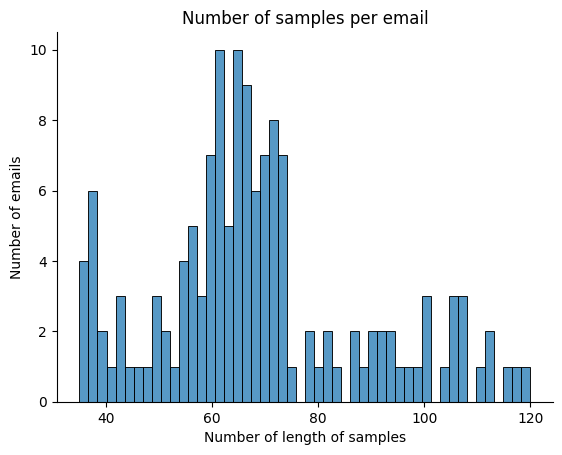

In [4]:
train_activity_samples, train_activity_sample_lengths, train_activity_columns = prepare_data_per_email(train_activity_df, train_label_df)

[column_types_value_counts] 
 0
<class 'numpy.int64'>      23
<class 'str'>               9
<class 'numpy.float64'>     4
Name: count, dtype: int64

[lable_value_counts] 
 DIAG_NM
CN     85
MCI    47
Dem     9
Name: count, dtype: int64


100%|██████████| 9705/9705 [00:10<00:00, 920.01it/s]


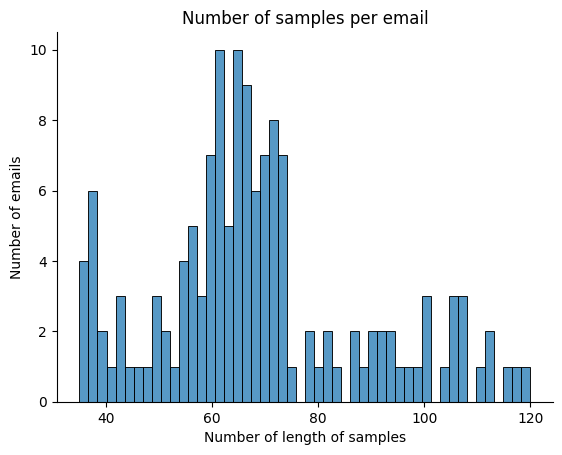

In [5]:
train_sleep_samples, train_sleep_sample_lengths, train_sleep_columns = prepare_data_per_email(train_sleep_df, train_label_df)

In [6]:
train_mmse_df.head()

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+315@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29
1,nia+014@rowan.kr,3,MCI,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
2,nia+220@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+096@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
4,nia+396@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30


In [7]:
train_mmse_df['Q01'].dtypes

dtype('int64')

### valid

[column_types_value_counts] 
 0
<class 'numpy.int64'>      23
<class 'str'>               7
<class 'numpy.float64'>     1
Name: count, dtype: int64

[lable_value_counts] 
 DIAG_NM
CN     26
MCI     4
Dem     3
Name: count, dtype: int64


100%|██████████| 2478/2478 [00:02<00:00, 981.97it/s]


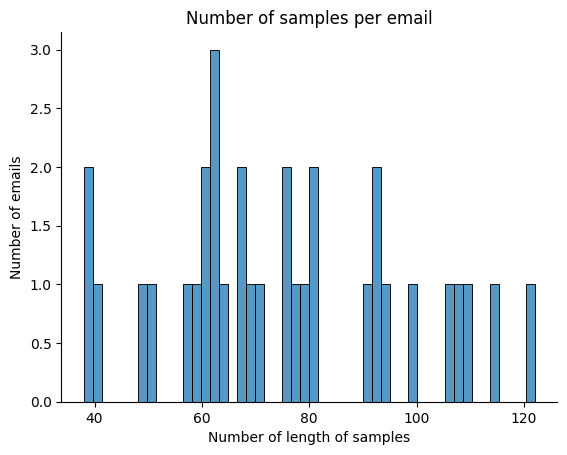

In [8]:
valid_activity_samples, valid_activity_sample_lengths, valid_activity_columns = prepare_data_per_email(valid_activity_df, valid_label_df)

[column_types_value_counts] 
 0
<class 'numpy.int64'>      23
<class 'str'>               9
<class 'numpy.float64'>     4
Name: count, dtype: int64

[lable_value_counts] 
 DIAG_NM
CN     26
MCI     4
Dem     3
Name: count, dtype: int64


100%|██████████| 2478/2478 [00:02<00:00, 911.39it/s]


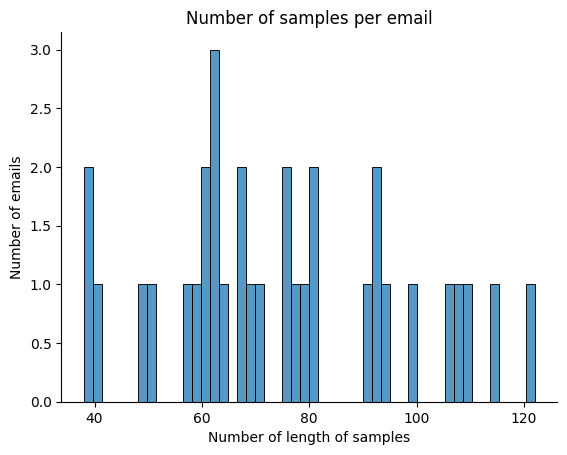

In [9]:
valid_sleep_samples, valid_sleep_sample_lengths, valid_sleep_columns = prepare_data_per_email(valid_sleep_df, valid_label_df)

In [10]:
valid_mmse_df.head()

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+163@rowan.kr,4,CN,-,4,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,27
1,nia+280@rowan.kr,1,CN,-,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,29
2,nia+322@rowan.kr,1,CN,-,1,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
3,nia+173@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
4,nia+320@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29


## activity, sleep 의 평균값 또는 중간값으로 통일

In [11]:
def make_mean_or_median_df(samples:list[(pd.DataFrame,str)], type:str) -> pd.DataFrame:
    """
    samples: list of tuples of (sample, label)
    type: 'mean' or 'median'
    """

    if type not in ['mean', 'median']:
        raise ValueError('type should be either mean or median')
    
    df = pd.DataFrame(columns=samples[0][0].columns)

    for sample, label in tqdm(samples, total=len(samples)):
        sample_email = sample['SAMPLE_EMAIL'][0]
        sample = sample.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL'])

        if type == 'mean':
            mean = sample.mean()
        else:
            mean = sample.median()
        
        mean['DIAG_NM'] = label
        mean['SAMPLE_EMAIL'] = sample_email
        df = pd.concat([df, mean.to_frame().T], axis=0, ignore_index=True)

    return df

In [12]:
train_activity_mean_df = make_mean_or_median_df(train_activity_samples, 'mean')
train_activity_median_df = make_mean_or_median_df(train_activity_samples, 'median')

train_sleep_mean_df = make_mean_or_median_df(train_sleep_samples, 'mean')
train_sleep_median_df = make_mean_or_median_df(train_sleep_samples, 'median')

100%|██████████| 141/141 [00:00<00:00, 389.35it/s]


In [13]:
train_activity_mean_df.head()

,SAMPLE_EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,...,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,DIAG_NM
0,nia+279@rowan.kr,1.346191,241.25,2328.9375,3780.546875,0.1875,606.203125,0.296875,273.671875,8.78125,...,63.828125,36.21875,98.140625,99.0,67.78125,23.5,53.28125,5070.515625,282.640625,MCI
1,nia+354@rowan.kr,1.460526,457.508772,2545.280702,8809.596491,1.807018,543.438596,0.438596,304.368421,32.0,...,87.157895,78.017544,96.736842,98.421053,74.789474,82.807018,93.649123,9584.631579,338.175439,CN
2,nia+088@rowan.kr,1.287202,211.380952,2221.857143,3977.833333,0.02381,650.571429,0.595238,145.761905,17.428571,...,66.142857,38.714286,95.571429,97.809524,61.357143,35.142857,65.761905,5141.904762,163.214286,MCI
3,nia+343@rowan.kr,1.371472,324.467742,2118.774194,6996.887097,4.483871,462.919355,0.112903,190.83871,61.935484,...,83.758065,48.83871,99.435484,97.5,86.322581,98.951613,96.66129,7494.274194,257.258065,CN
4,nia+016@rowan.kr,1.439366,365.402985,2278.313433,7412.865672,2.835821,608.283582,0.358209,204.014925,76.298507,...,91.104478,90.910448,97.492537,96.477612,66.791045,100.0,97.671642,10001.850746,283.149254,MCI


In [14]:
train_sleep_mean_df.head()

,SAMPLE_EMAIL,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,DIAG_NM
0,nia+279@rowan.kr,5495.625,17.884766,8213.4375,28571.25,81.828125,52.198437,47.9375,1.0,10712.34375,...,98.546875,79.0,75.796875,85.8125,59.875,68.03125,-0.137187,-0.137187,23075.625,MCI
1,nia+354@rowan.kr,6536.842105,16.263158,4858.421053,30076.842105,78.561404,51.599298,48.280702,1.0,17059.473684,...,84.684211,53.315789,68.350877,80.175439,23.929825,70.649123,0.020877,0.020877,23540.0,CN
2,nia+088@rowan.kr,6811.428571,16.666667,5095.0,24241.428571,72.547619,54.381905,50.214286,1.0,10062.142857,...,87.714286,57.190476,54.833333,85.785714,32.97619,45.666667,0.08881,0.08881,17430.0,MCI
3,nia+343@rowan.kr,7050.483871,17.022177,2770.16129,34510.645161,80.096774,64.617903,60.548387,1.0,18875.322581,...,84.564516,62.951613,71.854839,76.903226,94.258065,93.274194,-0.044032,-0.044032,27460.16129,CN
4,nia+016@rowan.kr,5239.701493,16.376866,3756.268657,25422.985075,79.656716,50.279701,47.134328,1.0,15125.820896,...,95.179104,49.985075,71.223881,76.746269,28.238806,74.761194,-0.064328,-0.064328,20183.283582,MCI


In [15]:
train_mmse_df.head()

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+315@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29
1,nia+014@rowan.kr,3,MCI,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
2,nia+220@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+096@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
4,nia+396@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30


In [16]:
valid_activity_mean_df = make_mean_or_median_df(valid_activity_samples, 'mean')
valid_activity_median_df = make_mean_or_median_df(valid_activity_samples, 'median')

valid_sleep_mean_df = make_mean_or_median_df(valid_sleep_samples, 'mean')
valid_sleep_median_df = make_mean_or_median_df(valid_sleep_samples, 'median')

  0%|          | 0/33 [00:00<?, ?it/s]

100%|██████████| 33/33 [00:00<00:00, 389.01it/s]


In [17]:
valid_activity_mean_df.head()

,SAMPLE_EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,...,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,DIAG_NM
0,nia+404@rowan.kr,1.404337,329.102041,2448.530612,6054.040816,0.77551,594.326531,0.387755,289.142857,18.897959,...,78.408163,73.326531,97.306122,99.693878,68.877551,46.061224,71.306122,7307.346939,308.816327,CN
1,nia+245@rowan.kr,1.819336,1007.96875,3209.5,18763.4375,26.9375,502.953125,0.5625,302.546875,157.640625,...,72.125,100.0,95.859375,2.328125,81.34375,100.0,100.0,22804.28125,487.125,MCI
2,nia+374@rowan.kr,1.445933,415.142857,2511.253968,7386.952381,0.206349,472.698413,0.15873,354.015873,34.174603,...,84.428571,73.126984,99.015873,96.15873,84.269841,75.222222,82.079365,9582.507937,388.396825,CN
3,nia+027@rowan.kr,1.334016,276.704918,2316.704918,5059.04918,2.639344,641.704918,1.508197,189.180328,32.196721,...,67.491803,29.885246,84.016393,98.540984,61.557377,61.42623,79.180328,6098.868852,224.016393,CN
4,nia+327@rowan.kr,1.662007,794.973684,2893.697368,14146.618421,9.552632,497.592105,1.013158,283.144737,87.394737,...,79.407895,100.0,90.434211,35.473684,80.657895,100.0,99.842105,15512.223684,380.092105,CN


In [18]:
valid_sleep_mean_df.head()

,SAMPLE_EMAIL,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,DIAG_NM
0,nia+404@rowan.kr,9076.530612,17.352041,2767.959184,28742.44898,69.285714,66.263469,59.693878,1.0,13728.367347,...,54.265306,50.836735,47.244898,79.55102,47.306122,54.673469,-0.073265,-0.073265,19665.918367,CN
1,nia+245@rowan.kr,4833.28125,16.597656,6715.3125,24309.375,80.765625,58.181719,53.53125,1.0,9383.90625,...,98.171875,72.203125,73.609375,74.484375,61.21875,64.25,0.041406,0.041406,19476.09375,MCI
2,nia+374@rowan.kr,5299.047619,16.117063,8952.857143,29897.142857,83.142857,54.499841,50.444444,1.0,13906.190476,...,98.873016,83.507937,77.730159,74.603175,25.714286,74.301587,-0.04873,-0.04873,24598.095238,CN
3,nia+027@rowan.kr,5478.688525,17.862705,5263.278689,30420.983607,82.081967,69.625738,64.803279,1.0,16088.852459,...,92.016393,69.0,76.393443,86.327869,63.377049,83.016393,0.032623,0.032623,24942.295082,CN
4,nia+327@rowan.kr,3708.947368,13.360197,6683.289474,29527.105263,87.578947,47.614342,42.815789,1.0,13000.263158,...,94.789474,65.657895,88.894737,77.684211,85.328947,79.394737,0.043816,0.043816,25818.157895,CN


In [19]:
valid_mmse_df.head()

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+163@rowan.kr,4,CN,-,4,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,27
1,nia+280@rowan.kr,1,CN,-,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,29
2,nia+322@rowan.kr,1,CN,-,1,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
3,nia+173@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
4,nia+320@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29


## 히스토그램

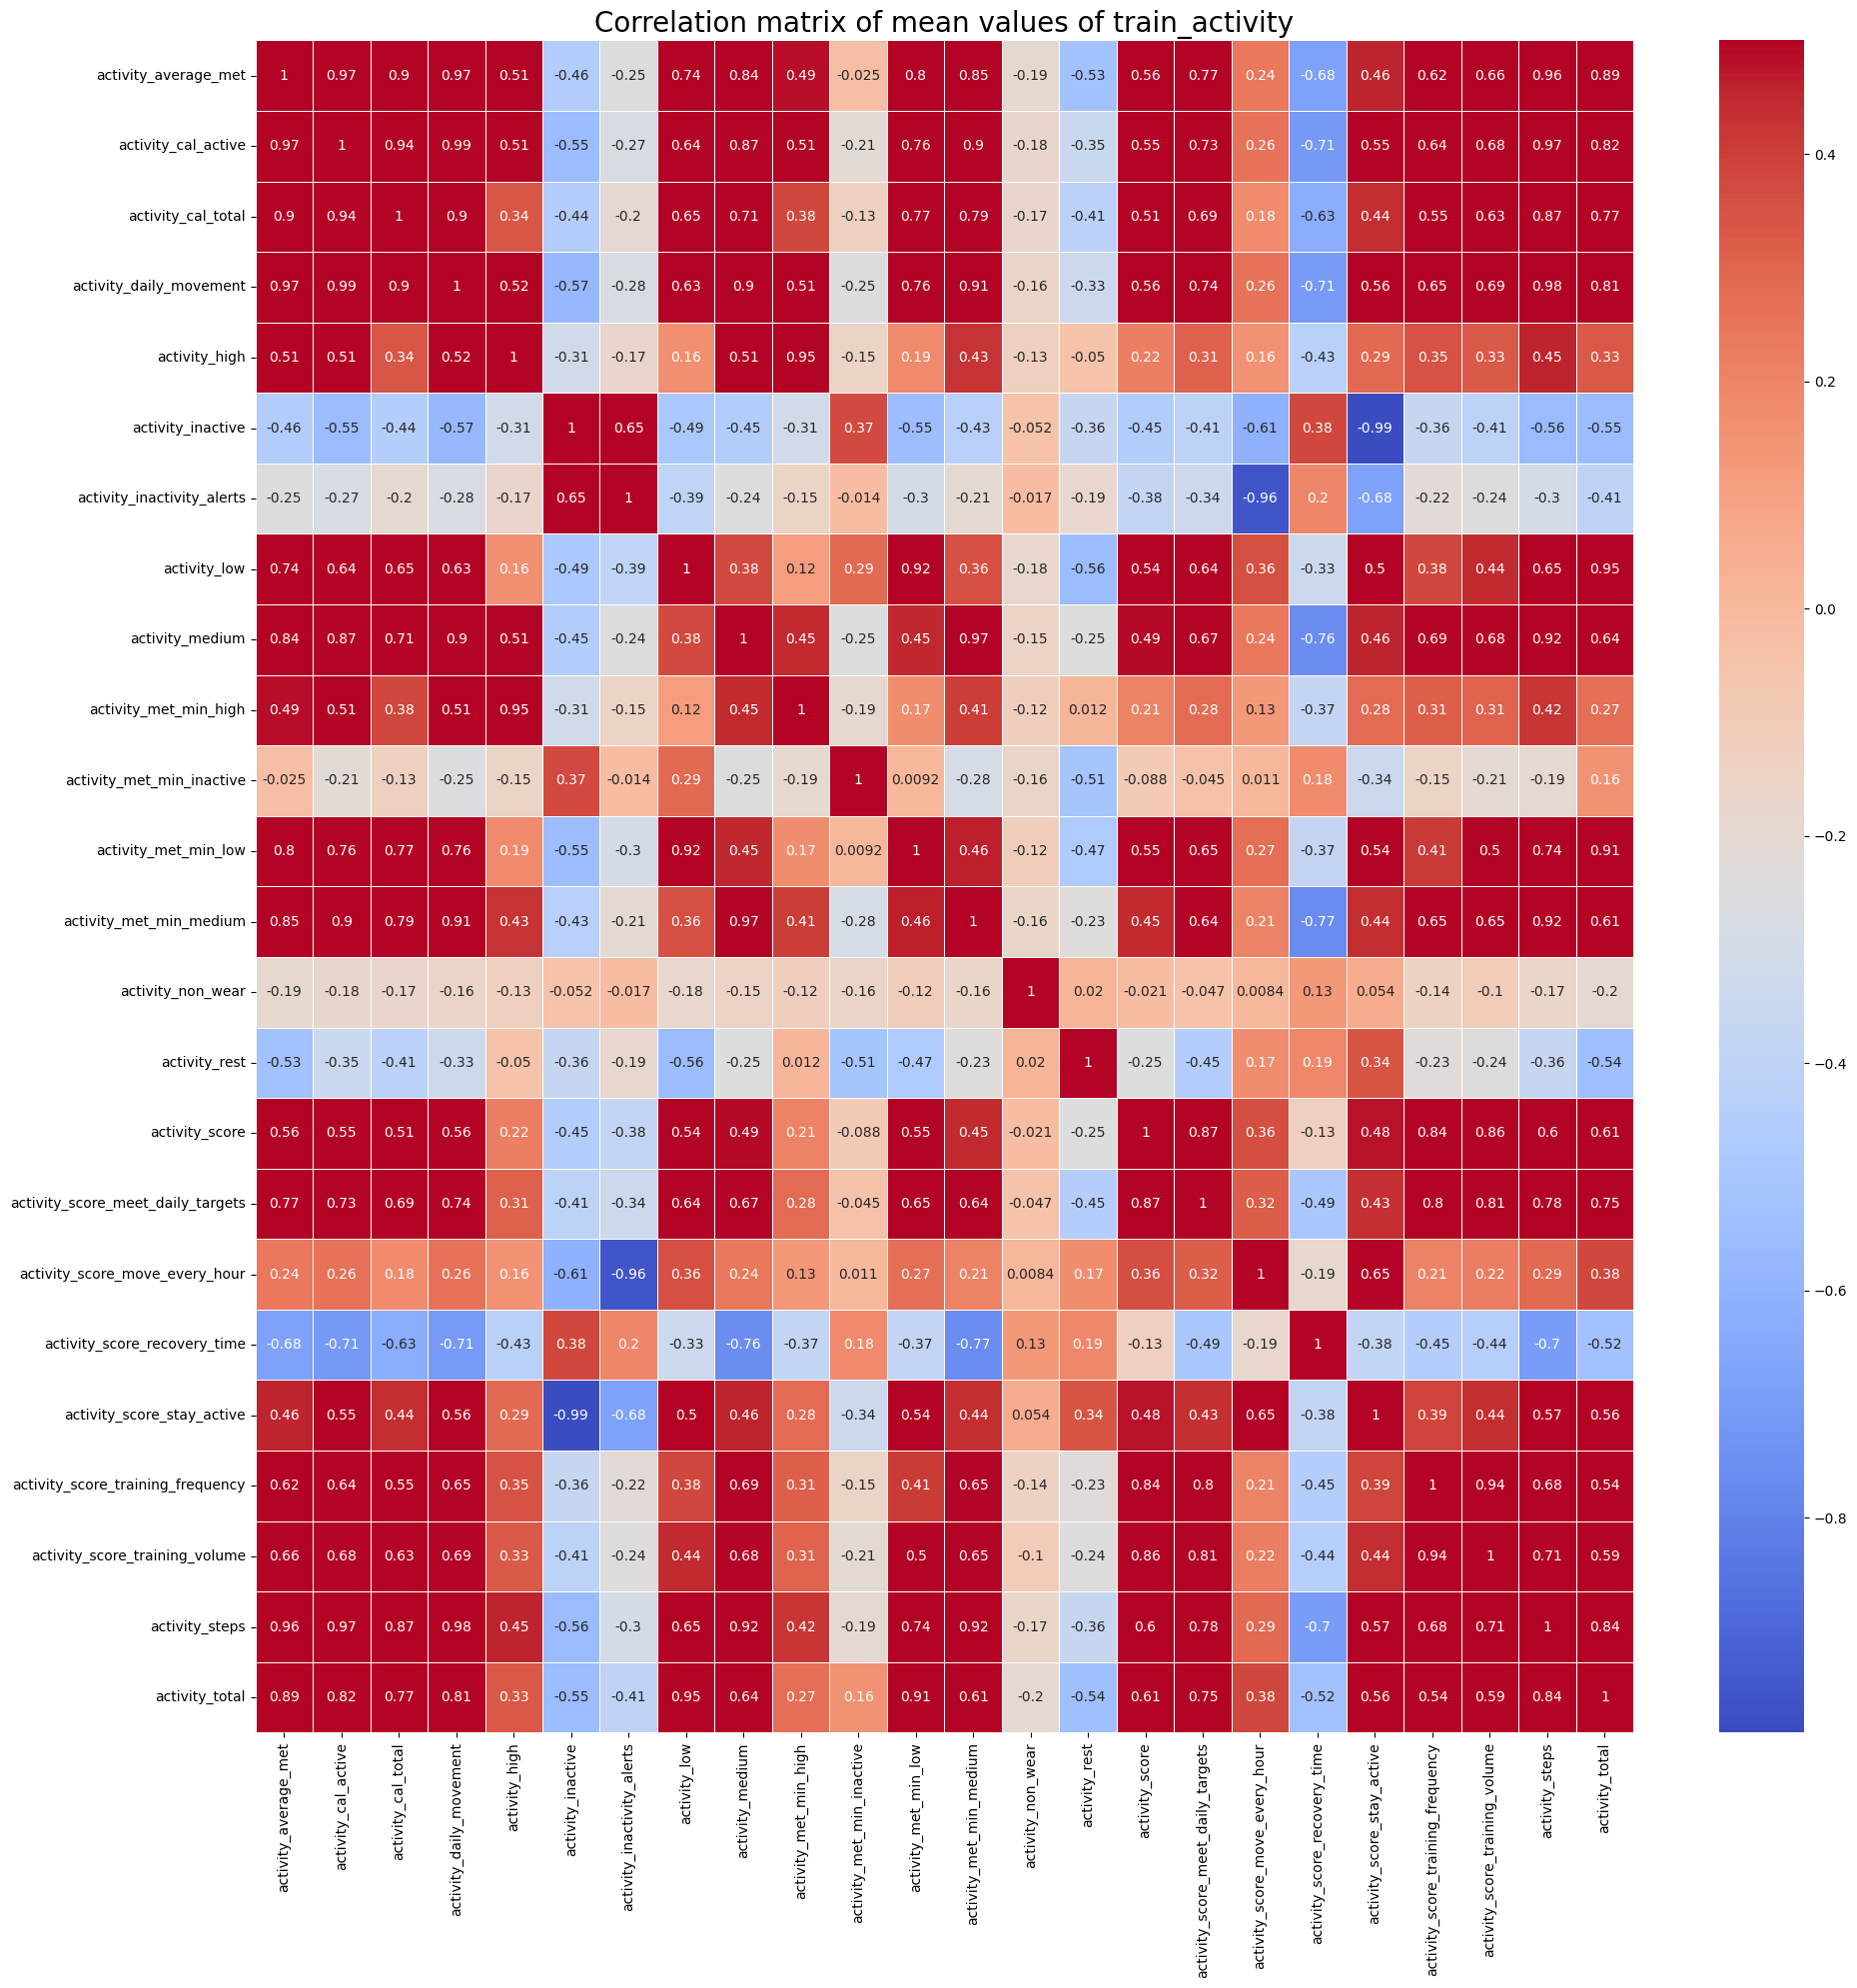

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_activity_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']).corr(), annot=True, linewidth = 0.5, vmax=0.5 , cmap='coolwarm')

plt.title('Correlation matrix of mean values of train_activity', fontsize=20)
plt.tight_layout()
plt.show()

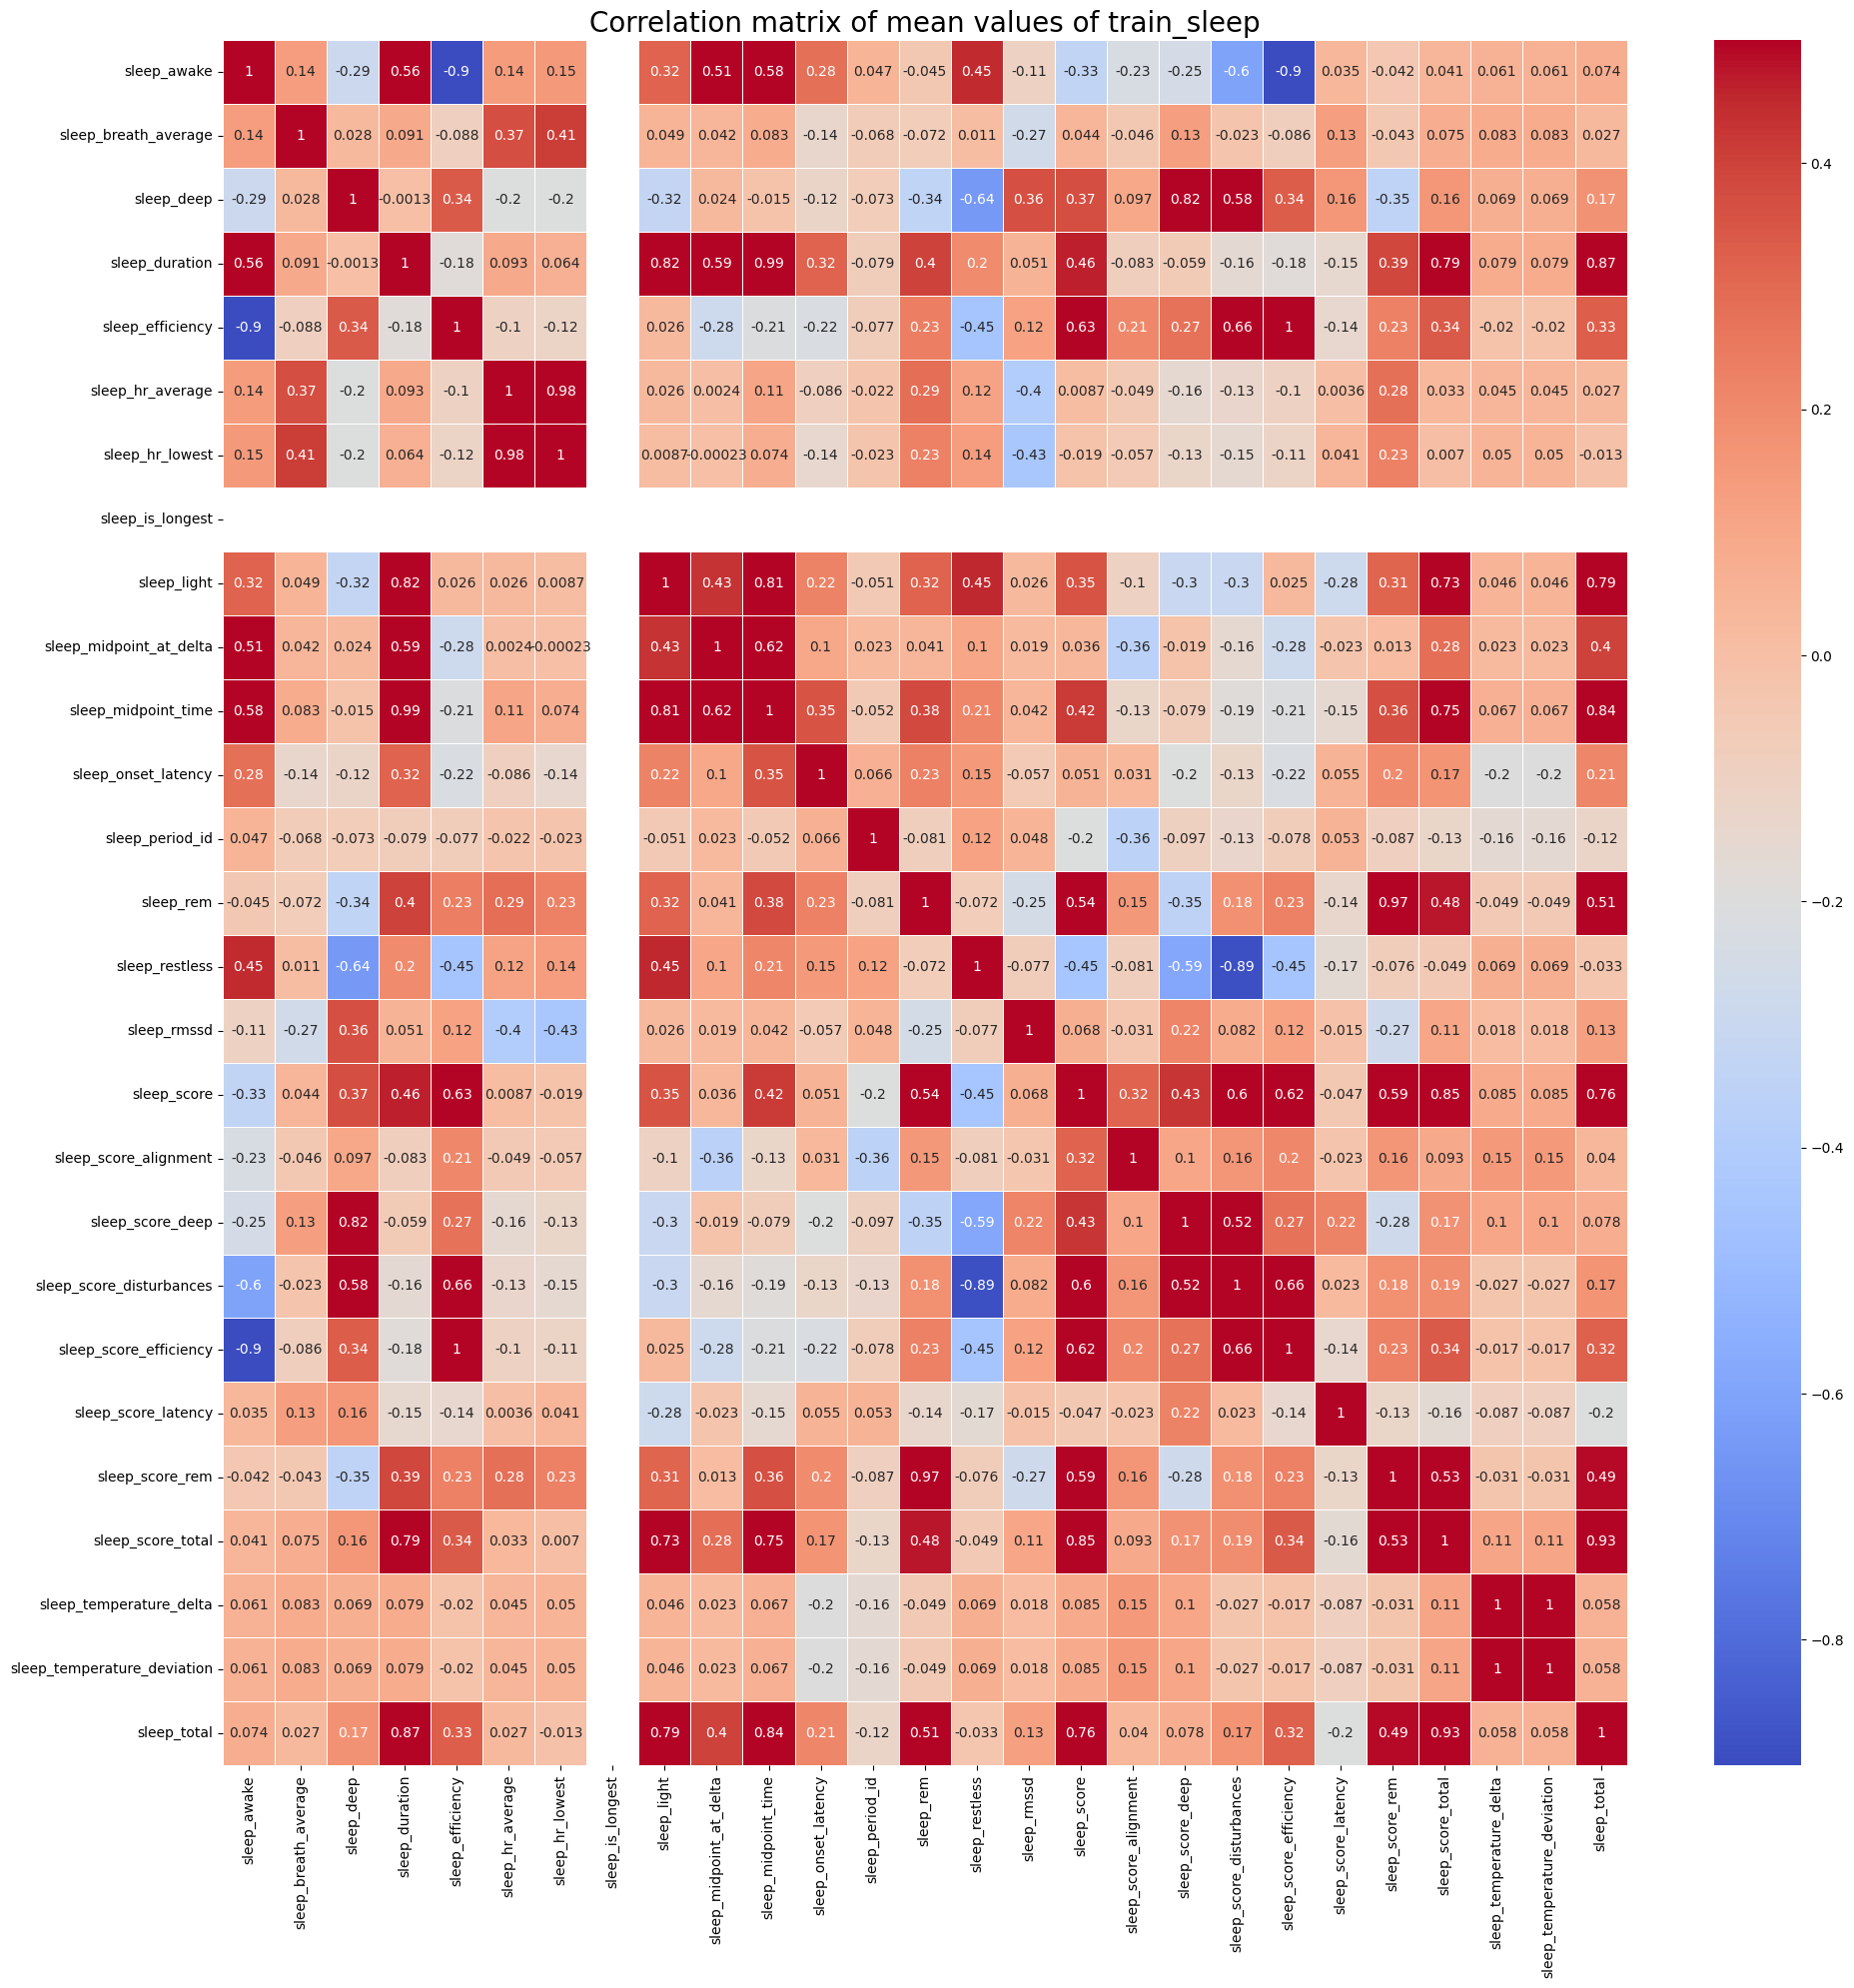

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_sleep_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']).corr(), annot=True, linewidth = 0.5, vmax=0.5 , cmap='coolwarm')

plt.title('Correlation matrix of mean values of train_sleep', fontsize=20)
plt.tight_layout()
plt.show()

[column_types_value_counts] 
 0
<class 'numpy.int64'>    35
<class 'str'>             3
Name: count, dtype: int64



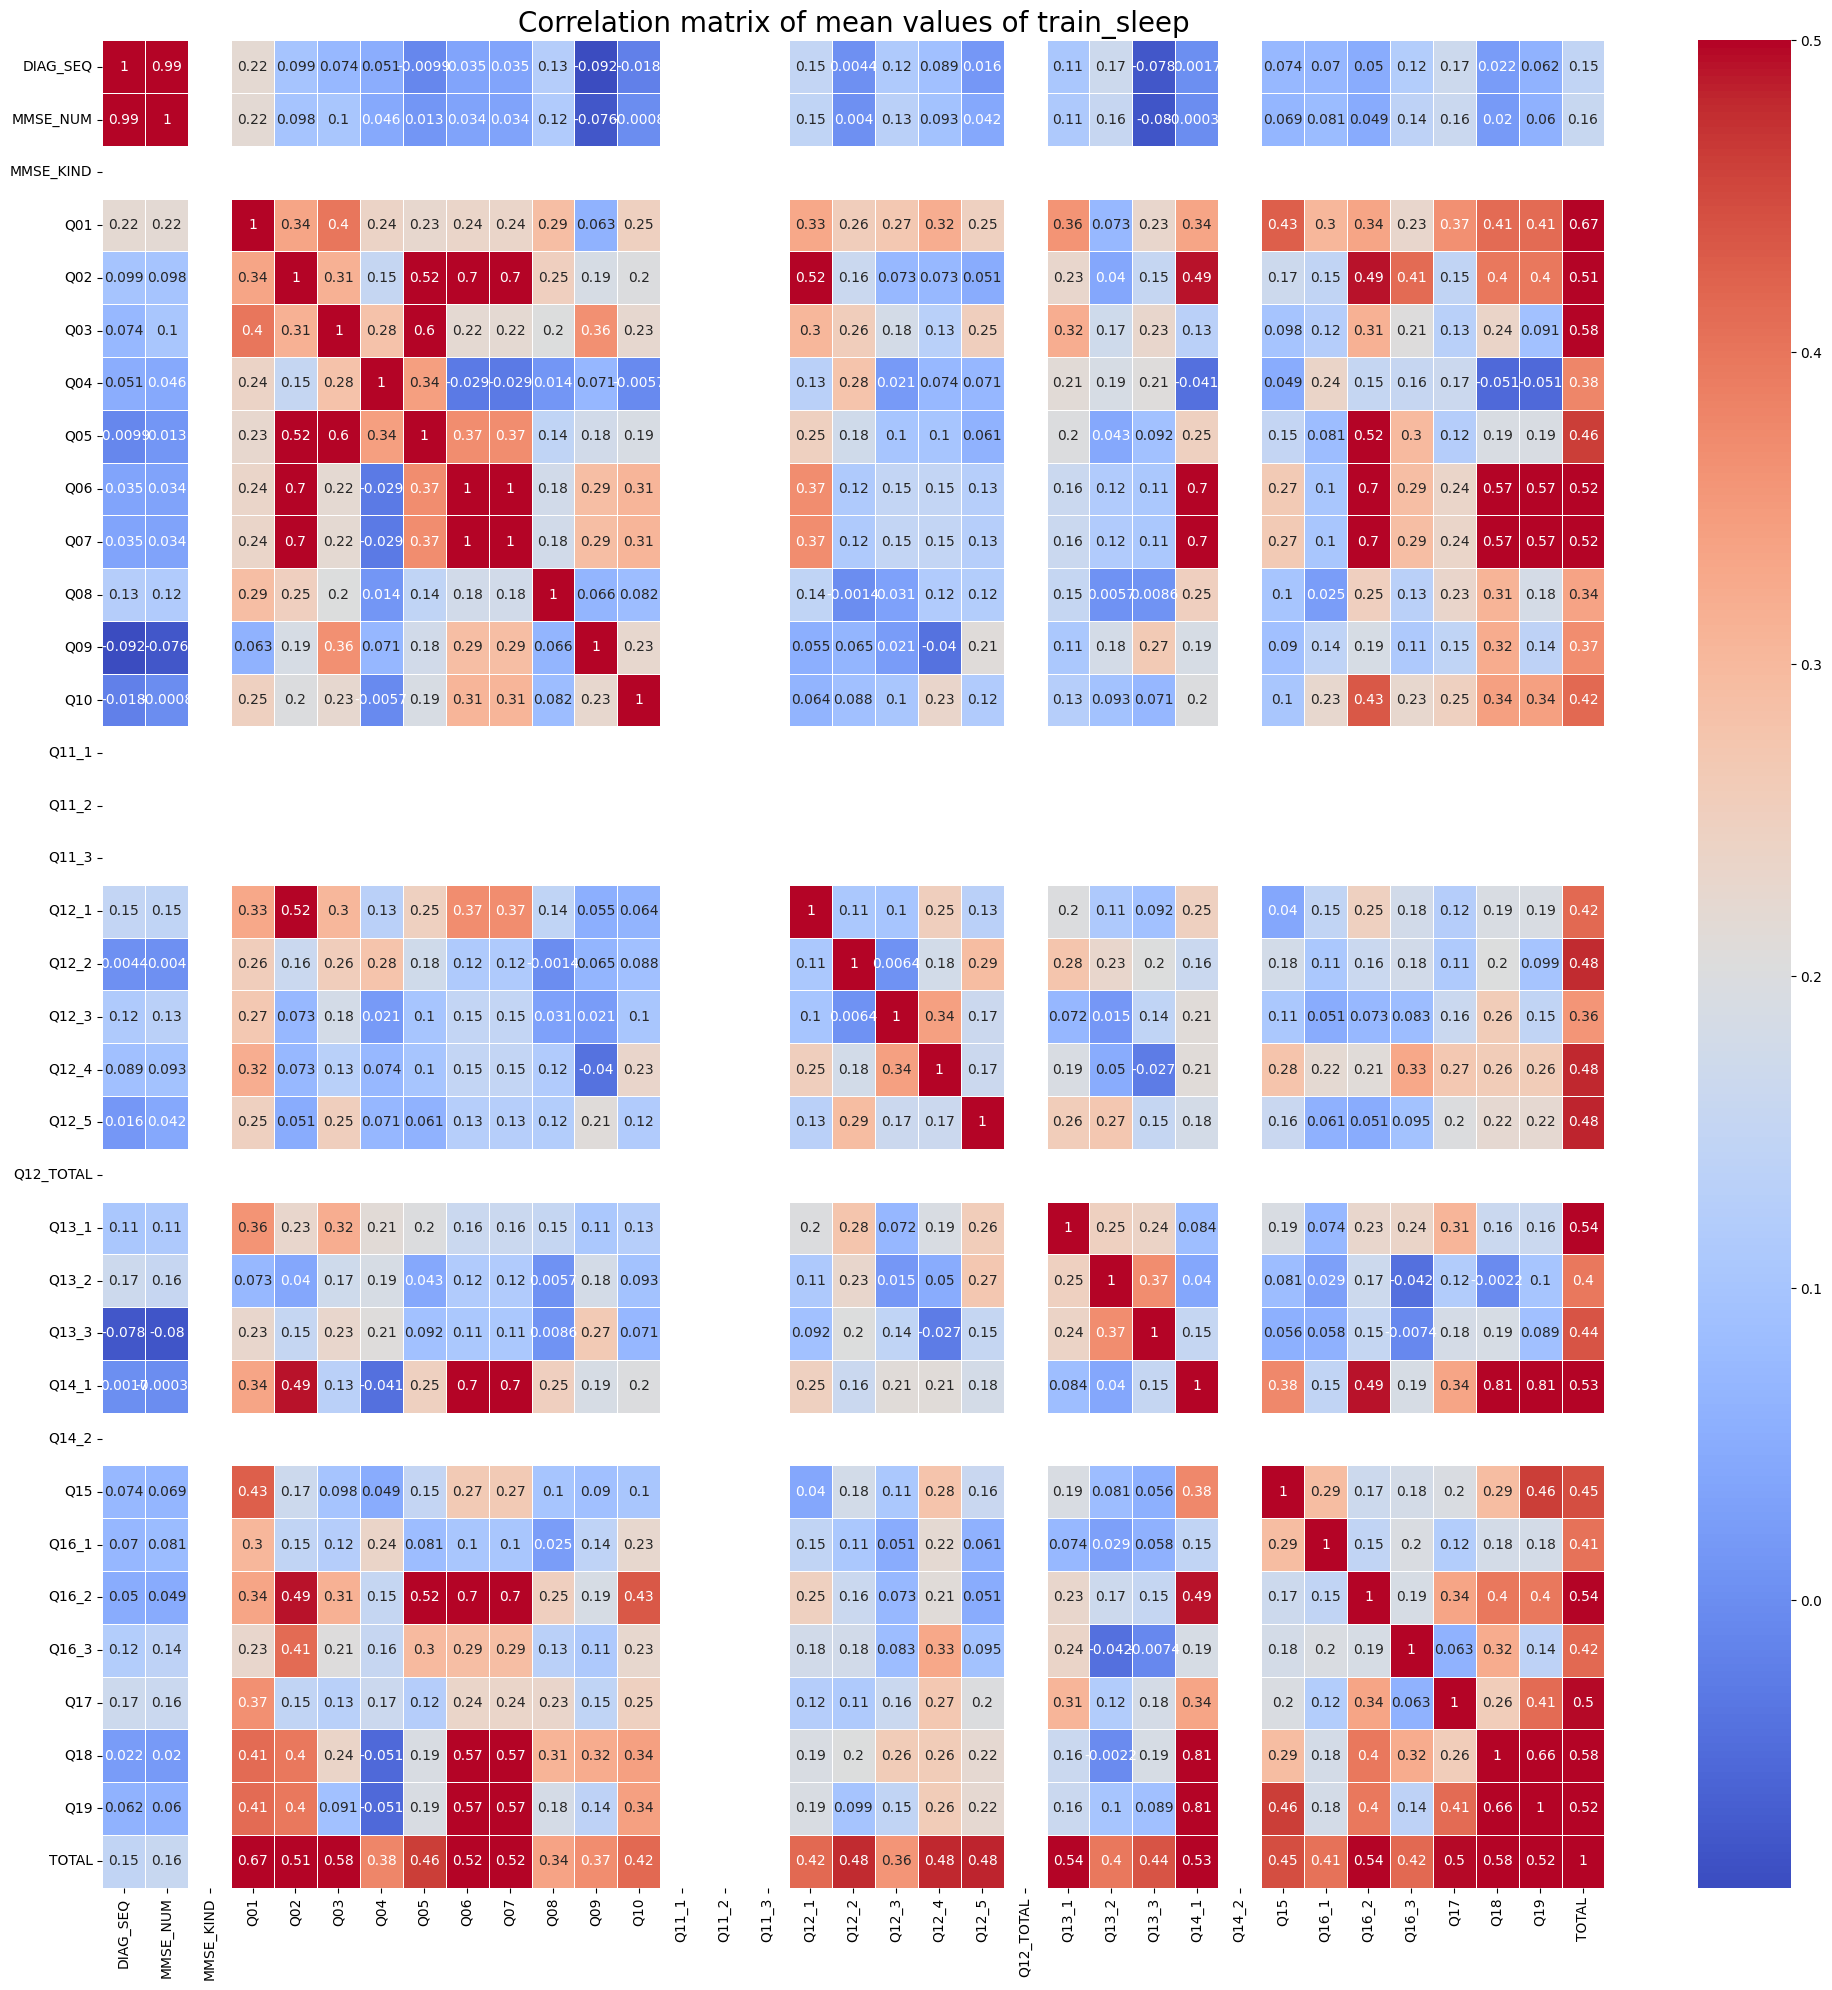

In [22]:
df = train_mmse_df.copy()

column_types = df.iloc[0].apply(lambda x: type(x)) # 숫자형 column과 문자형 column을 구분하기 위해 column의 type을 확인
print('[column_types_value_counts] \n',column_types.value_counts(), end='\n\n')
int_or_float_columns = column_types[column_types.isin([np.int64, np.float64])] # 숫자형 column

plt.figure(figsize=(20, 20))
sns.heatmap(df[int_or_float_columns.index].corr(), annot=True, linewidth = 0.5, vmax=0.5 , cmap='coolwarm')

plt.title('Correlation matrix of mean values of train_sleep', fontsize=20)
plt.tight_layout()
plt.show()

## 통일된 train, val DataFrame 만들기

In [69]:
def make_final_df(activity_df:pd.DataFrame, sleep_df:pd.DataFrame, mmse_df:pd.DataFrame) -> pd.DataFrame:
    """
    activity_df: mean or median dataframe of activity data
    sleep_df: mean or median dataframe of sleep data
    mmse_df: mean or median dataframe of mmse data
    """

    # drop the DIAG_NM column from the activity_df and sleep_df
    activity_df = activity_df.drop(columns=['DIAG_NM'])
    sleep_df = sleep_df.copy()
    sleep_df = sleep_df.drop(columns=['DIAG_NM'])
    mmse_df = mmse_df.drop(columns=['DOCTOR_NM'])

    final_df = pd.merge(activity_df, sleep_df, on='SAMPLE_EMAIL')
    final_df = pd.merge(final_df, mmse_df, on='SAMPLE_EMAIL')

    return final_df

In [79]:
def make_final_df(activity_df:pd.DataFrame, sleep_df:pd.DataFrame, mmse_df:pd.DataFrame) -> pd.DataFrame:
    """
    activity_df: mean or median dataframe of activity data
    sleep_df: mean or median dataframe of sleep data
    mmse_df: mean or median dataframe of mmse data
    """

    # drop the DIAG_NM column from the activity_df and sleep_df
    activity_df = activity_df.drop(columns=['DIAG_NM'])
    sleep_df = sleep_df.copy()
    # sleep_df = sleep_df.drop(columns=['DIAG_NM'])
    # mmse_df = mmse_df.drop(columns=['DOCTOR_NM'])

    final_df = pd.merge(activity_df, sleep_df, on='SAMPLE_EMAIL')
    # final_df = pd.merge(final_df, mmse_df, on='SAMPLE_EMAIL')

    return final_df

In [80]:
train_final_df = make_final_df(train_activity_mean_df, train_sleep_mean_df, train_mmse_df)
valid_final_df = make_final_df(valid_activity_mean_df, valid_sleep_mean_df, valid_mmse_df)

In [81]:
train_final_df

,SAMPLE_EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,DIAG_NM
0,nia+279@rowan.kr,1.346191,241.25,2328.9375,3780.546875,0.1875,606.203125,0.296875,273.671875,8.78125,...,98.546875,79.0,75.796875,85.8125,59.875,68.03125,-0.137187,-0.137187,23075.625,MCI
1,nia+354@rowan.kr,1.460526,457.508772,2545.280702,8809.596491,1.807018,543.438596,0.438596,304.368421,32.0,...,84.684211,53.315789,68.350877,80.175439,23.929825,70.649123,0.020877,0.020877,23540.0,CN
2,nia+088@rowan.kr,1.287202,211.380952,2221.857143,3977.833333,0.02381,650.571429,0.595238,145.761905,17.428571,...,87.714286,57.190476,54.833333,85.785714,32.97619,45.666667,0.08881,0.08881,17430.0,MCI
3,nia+343@rowan.kr,1.371472,324.467742,2118.774194,6996.887097,4.483871,462.919355,0.112903,190.83871,61.935484,...,84.564516,62.951613,71.854839,76.903226,94.258065,93.274194,-0.044032,-0.044032,27460.16129,CN
4,nia+016@rowan.kr,1.439366,365.402985,2278.313433,7412.865672,2.835821,608.283582,0.358209,204.014925,76.298507,...,95.179104,49.985075,71.223881,76.746269,28.238806,74.761194,-0.064328,-0.064328,20183.283582,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,nia+240@rowan.kr,1.560417,686.316667,2754.616667,13412.883333,3.083333,400.933333,0.4,284.166667,92.6,...,54.483333,55.666667,66.233333,82.233333,75.166667,79.15,0.048833,0.048833,27394.0,CN
137,nia+234@rowan.kr,1.416556,502.957447,2497.031915,9319.223404,1.244681,452.882979,0.446809,191.234043,69.840426,...,88.276596,72.861702,65.159574,81.595745,47.12766,76.946809,-0.046383,-0.046383,26132.87234,CN
138,nia+397@rowan.kr,1.741554,945.702703,2951.189189,16650.216216,33.567568,336.594595,0.081081,196.459459,87.216216,...,79.0,53.918919,65.324324,79.27027,69.324324,78.567568,-0.220541,-0.220541,26054.594595,CN
139,nia+451@rowan.kr,1.625822,660.394737,2761.947368,12410.868421,8.710526,499.973684,0.447368,302.868421,78.710526,...,68.236842,61.578947,81.684211,75.684211,64.578947,67.973684,-0.05,-0.05,22883.684211,CN


In [82]:
train_final_df['DIAG_NM'].value_counts()

DIAG_NM
CN     85
MCI    47
Dem     9
Name: count, dtype: int64

In [83]:
print(train_final_df['activity_non_wear'].mean())
print(train_final_df['activity_non_wear'].median())

45.44937192284151
38.84848484848485


In [84]:
valid_final_df

,SAMPLE_EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,DIAG_NM
0,nia+404@rowan.kr,1.404337,329.102041,2448.530612,6054.040816,0.77551,594.326531,0.387755,289.142857,18.897959,...,54.265306,50.836735,47.244898,79.55102,47.306122,54.673469,-0.073265,-0.073265,19665.918367,CN
1,nia+245@rowan.kr,1.819336,1007.96875,3209.5,18763.4375,26.9375,502.953125,0.5625,302.546875,157.640625,...,98.171875,72.203125,73.609375,74.484375,61.21875,64.25,0.041406,0.041406,19476.09375,MCI
2,nia+374@rowan.kr,1.445933,415.142857,2511.253968,7386.952381,0.206349,472.698413,0.15873,354.015873,34.174603,...,98.873016,83.507937,77.730159,74.603175,25.714286,74.301587,-0.04873,-0.04873,24598.095238,CN
3,nia+027@rowan.kr,1.334016,276.704918,2316.704918,5059.04918,2.639344,641.704918,1.508197,189.180328,32.196721,...,92.016393,69.0,76.393443,86.327869,63.377049,83.016393,0.032623,0.032623,24942.295082,CN
4,nia+327@rowan.kr,1.662007,794.973684,2893.697368,14146.618421,9.552632,497.592105,1.013158,283.144737,87.394737,...,94.789474,65.657895,88.894737,77.684211,85.328947,79.394737,0.043816,0.043816,25818.157895,CN
5,nia+064@rowan.kr,1.373214,339.0,2404.9,6246.128571,0.314286,528.9,0.071429,303.271429,20.7,...,84.628571,72.828571,69.214286,78.928571,47.257143,70.385714,-0.073857,-0.073857,23510.571429,CN
6,nia+210@rowan.kr,1.423387,387.247312,2479.064516,7061.946237,0.967742,480.193548,0.44086,339.473118,21.451613,...,89.268817,66.516129,71.989247,81.16129,48.72043,62.688172,-0.023763,-0.023763,21698.064516,CN
7,nia+85@rowan.kr,1.336538,290.494505,2327.934066,5319.571429,0.274725,551.516484,0.538462,228.934066,24.351648,...,95.340659,76.604396,78.186813,82.230769,37.230769,63.285714,-0.008681,-0.008681,21857.142857,CN
8,nia+022@rowan.kr,1.456653,496.919355,2540.693548,9172.741935,0.129032,506.967742,0.467742,185.645161,76.467742,...,80.177419,59.064516,60.33871,80.274194,77.629032,80.983871,-0.074355,-0.074355,26248.064516,MCI
9,nia+450@rowan.kr,1.560957,589.37037,2653.567901,11205.666667,9.740741,578.407407,0.333333,287.271605,69.123457,...,92.679012,74.641975,82.876543,77.135802,67.580247,70.395062,0.028889,0.028889,23015.185185,CN


### PCA

In [85]:
X = train_final_df.drop(columns=["SAMPLE_EMAIL", "DIAG_NM"])#, "TOTAL"])  # PCA에 사용할 피처들
y = train_final_df["DIAG_NM"] 

In [113]:
# MCI와 CN을 동일한 CN으로 통합

y = y.replace('MCI', 'CN')


In [115]:
y.value_counts()

DIAG_NM
CN     132
Dem      9
Name: count, dtype: int64

In [116]:
X

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total
0,1.346191,241.25,2328.9375,3780.546875,0.1875,606.203125,0.296875,273.671875,8.78125,1.359375,...,96.65625,98.546875,79.0,75.796875,85.8125,59.875,68.03125,-0.137187,-0.137187,23075.625
1,1.460526,457.508772,2545.280702,8809.596491,1.807018,543.438596,0.438596,304.368421,32.0,14.947368,...,84.842105,84.684211,53.315789,68.350877,80.175439,23.929825,70.649123,0.020877,0.020877,23540.0
2,1.287202,211.380952,2221.857143,3977.833333,0.02381,650.571429,0.595238,145.761905,17.428571,0.166667,...,92.0,87.714286,57.190476,54.833333,85.785714,32.97619,45.666667,0.08881,0.08881,17430.0
3,1.371472,324.467742,2118.774194,6996.887097,4.483871,462.919355,0.112903,190.83871,61.935484,27.709677,...,98.451613,84.564516,62.951613,71.854839,76.903226,94.258065,93.274194,-0.044032,-0.044032,27460.16129
4,1.439366,365.402985,2278.313433,7412.865672,2.835821,608.283582,0.358209,204.014925,76.298507,16.970149,...,99.910448,95.179104,49.985075,71.223881,76.746269,28.238806,74.761194,-0.064328,-0.064328,20183.283582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.560417,686.316667,2754.616667,13412.883333,3.083333,400.933333,0.4,284.166667,92.6,23.583333,...,89.483333,54.483333,55.666667,66.233333,82.233333,75.166667,79.15,0.048833,0.048833,27394.0
137,1.416556,502.957447,2497.031915,9319.223404,1.244681,452.882979,0.446809,191.234043,69.840426,8.765957,...,88.93617,88.276596,72.861702,65.159574,81.595745,47.12766,76.946809,-0.046383,-0.046383,26132.87234
138,1.741554,945.702703,2951.189189,16650.216216,33.567568,336.594595,0.081081,196.459459,87.216216,331.945946,...,93.594595,79.0,53.918919,65.324324,79.27027,69.324324,78.567568,-0.220541,-0.220541,26054.594595
139,1.625822,660.394737,2761.947368,12410.868421,8.710526,499.973684,0.447368,302.868421,78.710526,70.026316,...,99.078947,68.236842,61.578947,81.684211,75.684211,64.578947,67.973684,-0.05,-0.05,22883.684211


In [117]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# 데이터 준비 (X, y: X는 특성, y는 라벨)
# 예시로 y가 ['MCI', 'CN', 'Dem'] 형태라고 가정

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 각 라벨별로 데이터 필터링
labels = ['CN', 'Dem'] # 'MCI', 
centroids = {}

for label in labels:
    points = X_pca[y == label]  # y는 라벨 배열 (예: numpy 배열 또는 pandas Series)
    centroids[label] = np.mean(points, axis=0)

# 라벨 간 거리 계산
distances = {}
for i, label1 in enumerate(labels):
    for label2 in labels[i + 1:]:
        dist = euclidean(centroids[label1], centroids[label2])
        distances[f"{label1}-{label2}"] = dist

# 결과 출력
for pair, dist in distances.items():
    print(f"Distance between {pair}: {dist}")


Distance between CN-Dem: 3.295201482121684


In [101]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# 데이터 준비 (X, y: X는 특성, y는 라벨)
# 예시로 y가 ['MCI', 'CN', 'Dem'] 형태라고 가정

def calcuate_distance(X, y):
    # 데이터 정규화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA 수행 (2차원으로 축소)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # 각 라벨별로 데이터 필터링
    labels = ['MCI', 'CN', 'Dem']
    centroids = {}

    for label in labels:
        points = X_pca[y == label]  # y는 라벨 배열 (예: numpy 배열 또는 pandas Series)
        centroids[label] = np.mean(points, axis=0)

    # 라벨 간 거리 계산
    distances = {}
    for i, label1 in enumerate(labels):
        for label2 in labels[i + 1:]:
            dist = euclidean(centroids[label1], centroids[label2])
            distances[f"{label1}-{label2}"] = dist

    # 결과 출력
    for pair, dist in distances.items():
        print(f"Distance between {pair}: {dist}")


In [102]:
calcuate_distance(X, y)

Distance between MCI-CN: 0.17841266526569366
Distance between MCI-Dem: 3.286971980541312
Distance between CN-Dem: 3.30146002892239


In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def plot_pca_scatterplot(X: pd.DataFrame, y: pd.Series) -> None:

    # 데이터 정규화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA 수행 (2차원으로 축소)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # 데이터와 라벨을 DataFrame으로 변환
    df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
    df["Label"] = y  # y는 라벨 정보 (예: 'MCI', 'CN', 'Dem')

    # 각 라벨별 중심 계산
    centroids = df.groupby("Label")[["PC1", "PC2"]].mean()

    # 라벨별 색상 설정 (Seaborn Deep 팔레트에서 가져옴)
    palette = {"MCI": "#4C72B0", "CN": "#DD8452", "Dem": "#55A868"}  # 기본 색상
    centroid_colors = {"MCI": "#002E6D", "CN": "#A53B00", "Dem": "#2F6B36"}  # 더 진한 색상

    # Scatterplot 그리기
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x="PC1", y="PC2", hue="Label", palette=palette, s=50, alpha=0.7)

    # 중심점 추가 (라벨별 진한 색상 사용)
    for label, coord in centroids.iterrows():
        plt.scatter(
            coord["PC1"], coord["PC2"],
            color=centroid_colors[label], label=f"{label} Centroid", s=200, edgecolor="white"
        )

    # 그래프 꾸미기
    plt.title("PCA Scatterplot with Centroids (without mmse)", fontsize=16)
    plt.xlabel("Principal Component 1 (PC1)", fontsize=14)
    plt.ylabel("Principal Component 2 (PC2)", fontsize=14)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.tight_layout()

    # 그래프 출력
    plt.show()


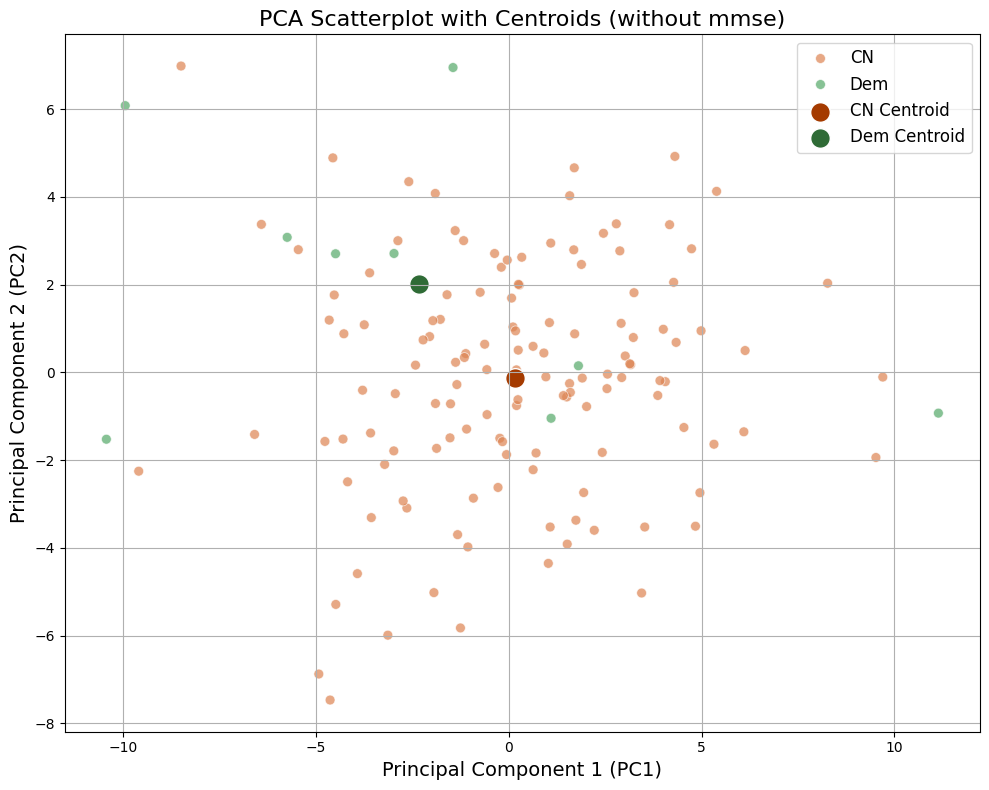

In [119]:
plot_pca_scatterplot(X, y)

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# 후진 소거법 함수 정의
def backward_elimination_for_pca(df, labels, target_labels, palette, centroid_colors):
    # 1. 초기 설정
    selected_features = list(df.columns)
    removed_features = []
    prev_distance = 0
    num_removed = 0

    # 필터링: 두 개의 라벨만 선택
    data = df[labels.isin(target_labels)]
    labels = labels[labels.isin(target_labels)]

    while True:
        max_distance = 0
        feature_to_remove = None

        # 2. 현재 사용 중인 변수로 PCA 수행
        for feature in selected_features:
            # 제거할 변수를 제외한 데이터
            current_features = [f for f in selected_features if f != feature]
            X = data[current_features]

            # 데이터 정규화 및 PCA
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_scaled)

            # 라벨별 중심 계산
            pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
            pca_df["Label"] = labels.values
            centroids = pca_df.groupby("Label")[["PC1", "PC2"]].mean()

            # 중심 간 거리 계산
            dist = euclidean(centroids.loc[target_labels[0]], centroids.loc[target_labels[1]])

            # 최대 거리 및 변수 업데이트
            if dist > max_distance:
                max_distance = dist
                feature_to_remove = feature

        # 3. 거리가 이전보다 증가하지 않으면 멈춤
        if max_distance <= prev_distance:
            break

        # 4. 거리 증가 시 변수 제거
        prev_distance = max_distance
        selected_features.remove(feature_to_remove)
        removed_features.append(feature_to_remove)
        num_removed += 1

    # 결과 출력
    print(f"Removed features: {removed_features}")
    print(f"Number of removed features: {num_removed}")
    print(f"Final_distance: {prev_distance}")
    print(f"Final selected features: {selected_features}")


    # 5. 초기와 최종 PCA 산점도 비교 (Scatterplot)
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    for i, (features, title) in enumerate(zip(
        [list(df.columns), selected_features],
        ["Initial Features", "Final Features"]
    )):
        # 데이터 정규화 및 PCA
        X = data[features]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # 라벨별 데이터 준비
        pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
        pca_df["Label"] = labels.values
        centroids = pca_df.groupby("Label")[["PC1", "PC2"]].mean()

        # 산점도
        sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Label", palette=palette, s=50, alpha=0.7, ax=axes[i])
        for label, coord in centroids.iterrows():
            axes[i].scatter(
                coord["PC1"], coord["PC2"],
                color=centroid_colors[label], s=200, edgecolor="white", label=f"{label} Centroid"
            )

        axes[i].set_title(title, fontsize=16)
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

    return selected_features
# 실행
palette = {"MCI": "#4C72B0", "CN": "#DD8452", "Dem": "#55A868"}  # 기본 색상
centroid_colors = {"MCI": "#002E6D", "CN": "#A53B00", "Dem": "#2F6B36"}  # 더 진한 색상

Removed features: ['sleep_score', 'sleep_score_total', 'activity_score_stay_active', 'sleep_score_rem', 'sleep_hr_average', 'activity_inactivity_alerts', 'sleep_hr_lowest', 'activity_score_move_every_hour', 'activity_cal_total', 'activity_met_min_medium', 'activity_medium', 'sleep_breath_average', 'sleep_period_id', 'activity_cal_active', 'sleep_temperature_delta', 'sleep_temperature_deviation', 'activity_non_wear', 'sleep_is_longest']
Number of removed features: 18
Final_distance: 3.866032941967032
Final selected features: ['activity_average_met', 'activity_daily_movement', 'activity_high', 'activity_inactive', 'activity_low', 'activity_met_min_high', 'activity_met_min_inactive', 'activity_met_min_low', 'activity_rest', 'activity_score', 'activity_score_meet_daily_targets', 'activity_score_recovery_time', 'activity_score_training_frequency', 'activity_score_training_volume', 'activity_steps', 'activity_total', 'sleep_awake', 'sleep_deep', 'sleep_duration', 'sleep_efficiency', 'sleep_l

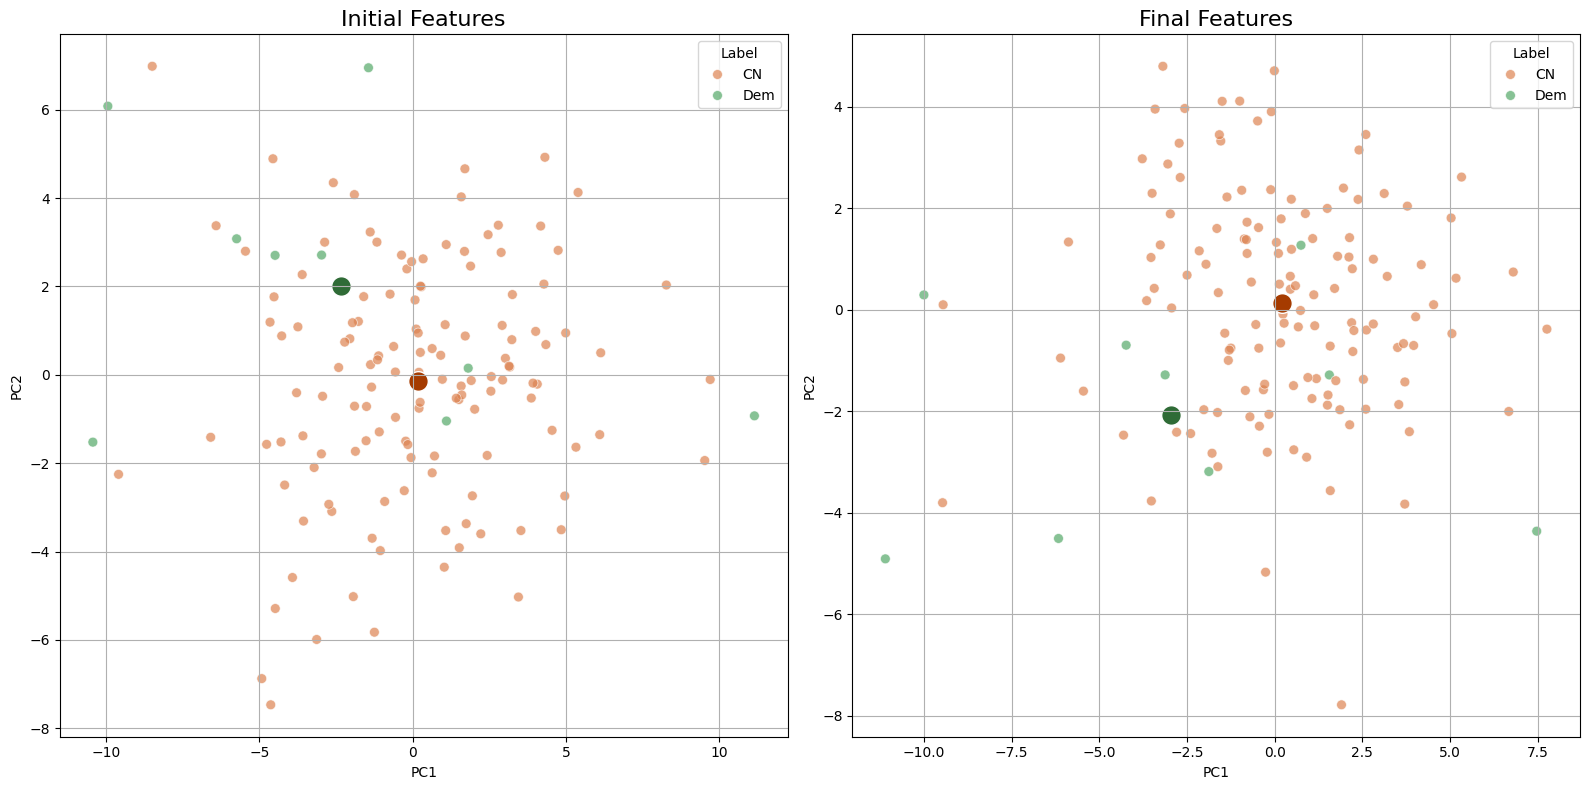

In [121]:
selected_features = backward_elimination_for_pca(
                    df=X,
                    labels=y,
                    target_labels=["CN", "Dem"],
                    palette=palette,
                    centroid_colors=centroid_colors
                )


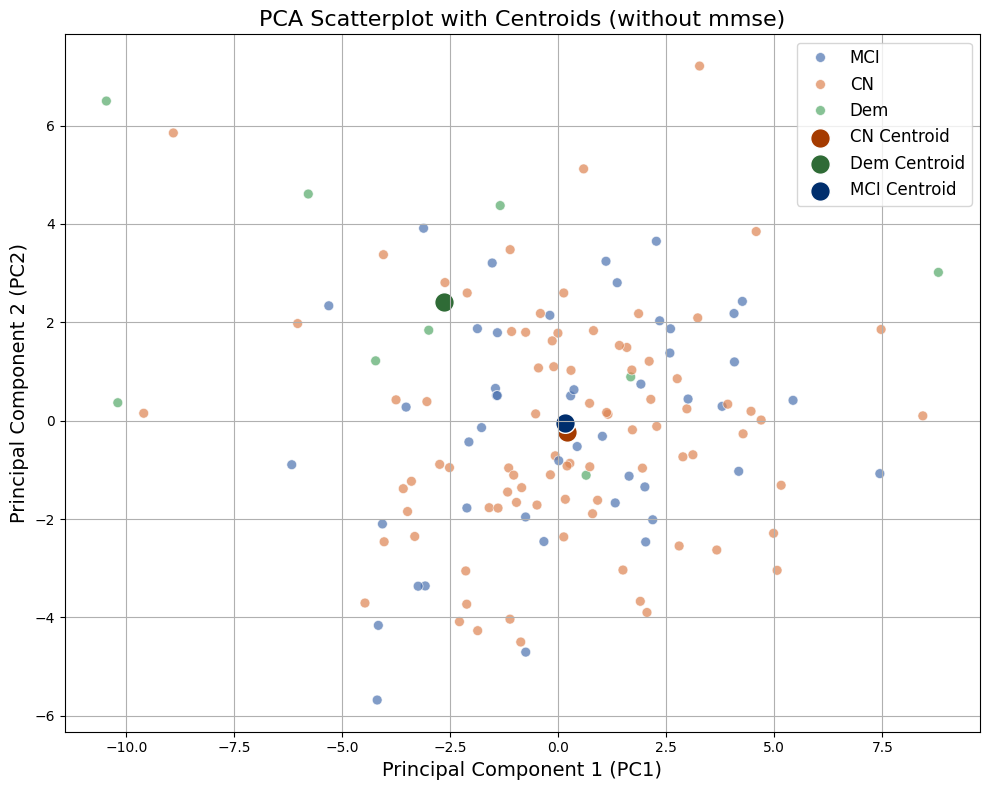

In [110]:
plot_pca_scatterplot(X[selected_features], y)

In [ ]:
calcuate_distance(X[selected_features], y)

In [124]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# 데이터 준비 (X, y: X는 특성, y는 라벨)
# 예시로 y가 ['MCI', 'CN', 'Dem'] 형태라고 가정

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])

# PCA 수행 (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 각 라벨별로 데이터 필터링
labels = ['CN', 'Dem'] # 'MCI', 
centroids = {}

for label in labels:
    points = X_pca[y == label]  # y는 라벨 배열 (예: numpy 배열 또는 pandas Series)
    centroids[label] = np.mean(points, axis=0)

# 라벨 간 거리 계산
distances = {}
for i, label1 in enumerate(labels):
    for label2 in labels[i + 1:]:
        dist = euclidean(centroids[label1], centroids[label2])
        distances[f"{label1}-{label2}"] = dist

# 결과 출력
for pair, dist in distances.items():
    print(f"Distance between {pair}: {dist}")


Distance between CN-Dem: 3.8660329419670316


In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 결과 확인
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.18620291 0.10331293]


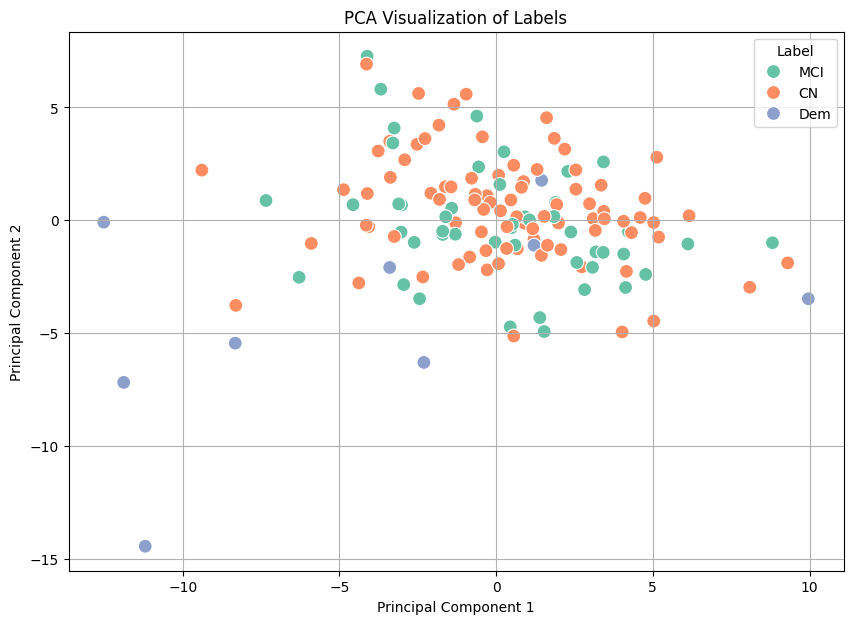

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임 생성
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Label"] = y

# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Label", palette="Set2", s=100)
plt.title("PCA Visualization of Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label")
plt.grid(True)
plt.show()


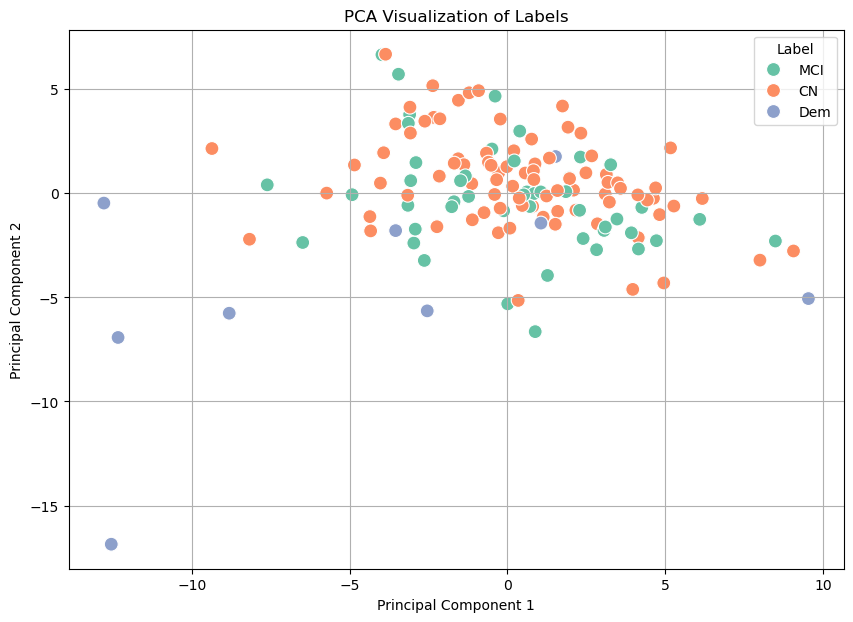

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임 생성
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Label"] = y

# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Label", palette="Set2", s=100)
plt.title("PCA Visualization of Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label")
plt.grid(True)
plt.show()


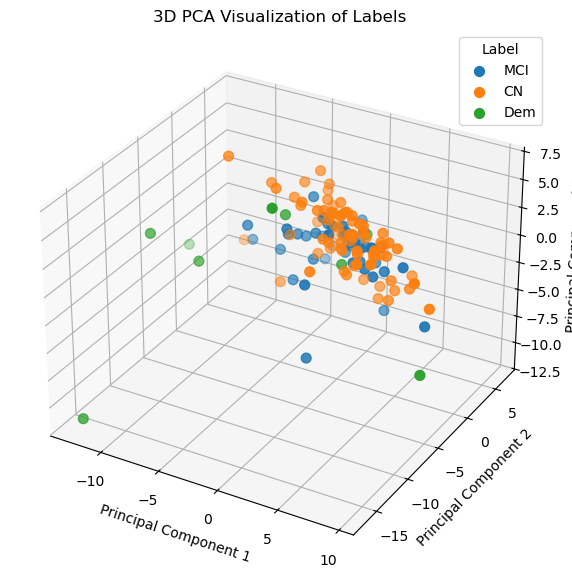

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# PCA 수행 (3차원)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 데이터 프레임 생성
pca_df_3d = pd.DataFrame(X_pca_3d, columns=["PC1", "PC2", "PC3"])
pca_df_3d["Label"] = y

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
for label in pca_df_3d["Label"].unique():
    subset = pca_df_3d[pca_df_3d["Label"] == label]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"], label=label, s=50)

ax.set_title("3D PCA Visualization of Labels")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(title="Label")
plt.show()


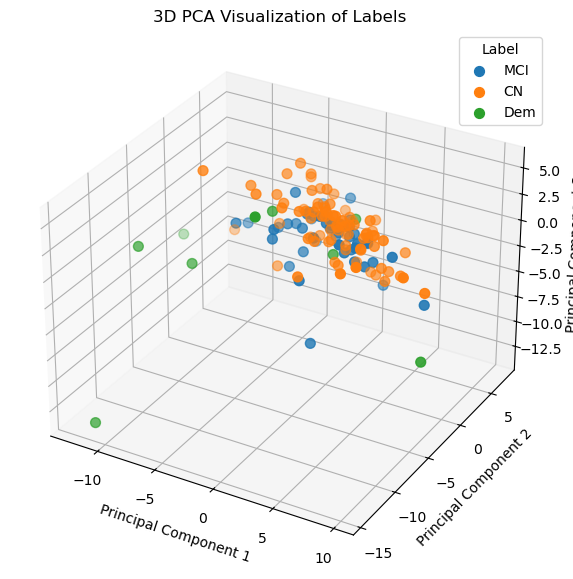

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# PCA 수행 (3차원)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 데이터 프레임 생성
pca_df_3d = pd.DataFrame(X_pca_3d, columns=["PC1", "PC2", "PC3"])
pca_df_3d["Label"] = y

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
for label in pca_df_3d["Label"].unique():
    subset = pca_df_3d[pca_df_3d["Label"] == label]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"], label=label, s=50)

ax.set_title("3D PCA Visualization of Labels")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(title="Label")
plt.show()


### t-SNE

In [31]:
from sklearn.preprocessing import StandardScaler

# 데이터 준비
X = train_final_df.drop(columns=["SAMPLE_EMAIL", "DIAG_NM","TOTAL"])  # t-SNE에 사용할 피처들
y = train_final_df["DIAG_NM"]  # 라벨

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [46]:
from sklearn.manifold import TSNE

# t-SNE 수행 (2차원)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)


c:\Users\user\anaconda3\envs\yolo\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


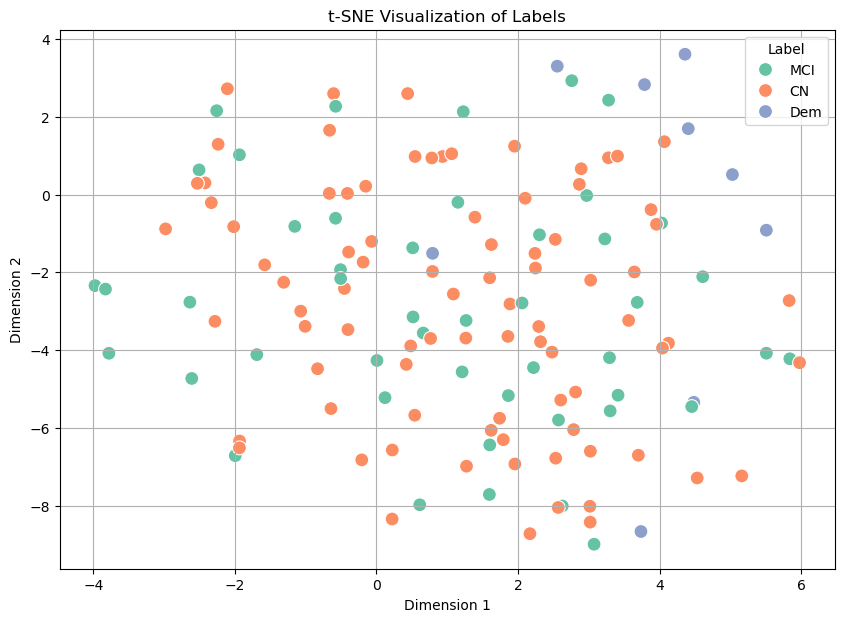

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임 생성
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["Label"] = y

# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="Label", palette="Set2", s=100)
plt.title("t-SNE Visualization of Labels")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Label")
plt.grid(True)
plt.show()


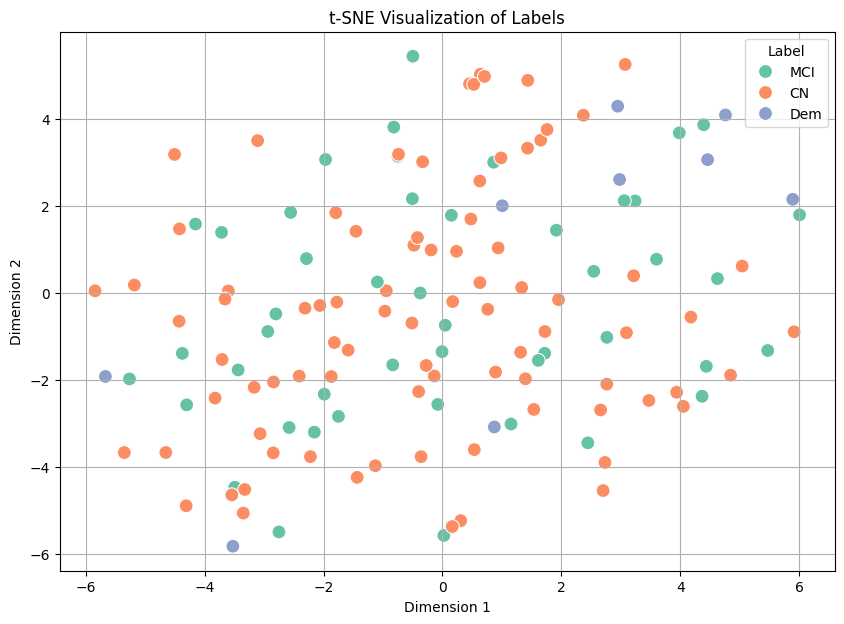

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임 생성
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["Label"] = y

# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="Label", palette="Set2", s=100)
plt.title("t-SNE Visualization of Labels")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Label")
plt.grid(True)
plt.show()


c:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


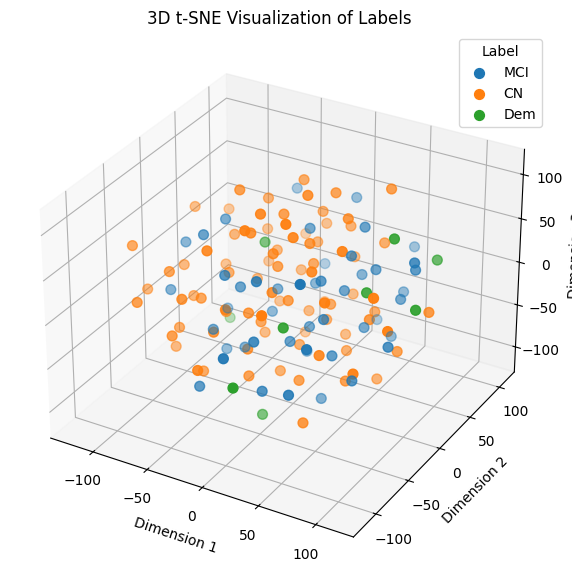

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# t-SNE 수행 (3차원)
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# 데이터 프레임 생성
tsne_df_3d = pd.DataFrame(X_tsne_3d, columns=["Dim1", "Dim2", "Dim3"])
tsne_df_3d["Label"] = y

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
for label in tsne_df_3d["Label"].unique():
    subset = tsne_df_3d[tsne_df_3d["Label"] == label]
    ax.scatter(subset["Dim1"], subset["Dim2"], subset["Dim3"], label=label, s=50)

ax.set_title("3D t-SNE Visualization of Labels")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.legend(title="Label")
plt.show()


c:\Users\user\anaconda3\envs\yolo\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


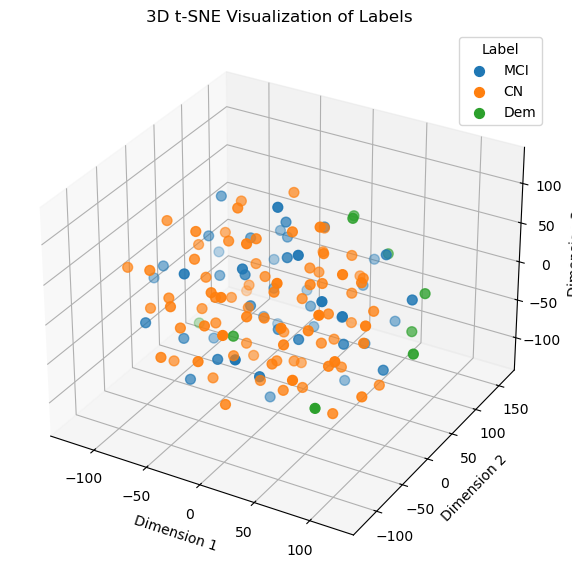

In [48]:
from mpl_toolkits.mplot3d import Axes3D

# t-SNE 수행 (3차원)
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# 데이터 프레임 생성
tsne_df_3d = pd.DataFrame(X_tsne_3d, columns=["Dim1", "Dim2", "Dim3"])
tsne_df_3d["Label"] = y

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
for label in tsne_df_3d["Label"].unique():
    subset = tsne_df_3d[tsne_df_3d["Label"] == label]
    ax.scatter(subset["Dim1"], subset["Dim2"], subset["Dim3"], label=label, s=50)

ax.set_title("3D t-SNE Visualization of Labels")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.legend(title="Label")
plt.show()


#### 다중 공선성

In [42]:
# train_activity_mean_df, train_sleep_mean_df, train_mmse_df
# valid_activity_mean_df, valid_sleep_mean_df, valid_mmse_df

In [134]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


def check_vif(df:pd.DataFrame) -> pd.DataFrame:
    """
    df: DataFrame
    """

    # 데이터 정규화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    # VIF 계산
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

    return vif_data

In [135]:
vif_data = check_vif(X[selected_features]).sort_values('VIF', ascending=False)
vif_data

,Feature,VIF
0,sleep_restless,6.725183
1,sleep_score_disturbances,5.943910
2,activity_rest,2.225878
3,sleep_midpoint_at_delta,1.814951
4,sleep_score_deep,1.777683
5,activity_met_min_inactive,1.685172
6,activity_inactive,1.407671
7,sleep_score_latency,1.305383
8,sleep_score_alignment,1.260889
9,sleep_onset_latency,1.168195


In [129]:
# 50 이상 제거
selected_features = vif_data[vif_data['VIF'] < 50]['Feature'].tolist()

vif_data = check_vif(X[selected_features]).sort_values('VIF', ascending=False)
vif_data

,Feature,VIF
3,activity_high,12.363476
0,activity_met_min_high,12.091255
5,sleep_restless,6.863956
4,sleep_score_disturbances,6.092113
2,activity_rest,2.397229
8,sleep_midpoint_at_delta,1.851773
7,sleep_score_deep,1.842930
6,activity_met_min_inactive,1.729482
1,activity_inactive,1.555495
12,sleep_score_latency,1.320429


In [130]:
# 10 이상 제거
selected_features = vif_data[vif_data['VIF'] < 10]['Feature'].tolist()

vif_data = check_vif(X[selected_features]).sort_values('VIF', ascending=False)
vif_data

,Feature,VIF
0,sleep_restless,6.725183
1,sleep_score_disturbances,5.943910
2,activity_rest,2.225878
3,sleep_midpoint_at_delta,1.814951
4,sleep_score_deep,1.777683
5,activity_met_min_inactive,1.685172
6,activity_inactive,1.407671
7,sleep_score_latency,1.305383
8,sleep_score_alignment,1.260889
9,sleep_onset_latency,1.168195


In [137]:
X[selected_features]

,sleep_restless,sleep_score_disturbances,activity_rest,sleep_midpoint_at_delta,sleep_score_deep,activity_met_min_inactive,activity_inactive,sleep_score_latency,sleep_score_alignment,sleep_onset_latency,sleep_rmssd
0,18.625,79.0,499.4375,18519.71875,98.546875,11.96875,606.203125,85.8125,96.65625,728.90625,47.421875
1,49.631579,53.315789,515.877193,12342.894737,84.684211,6.649123,543.438596,80.175439,84.842105,684.210526,86.824561
2,44.119048,57.190476,536.904762,3721.309524,87.714286,6.642857,650.571429,85.785714,92.0,686.428571,27.52381
3,41.564516,62.951613,634.580645,19489.66129,84.564516,8.145161,462.919355,76.903226,98.451613,577.741935,20.387097
4,48.955224,49.985075,447.432836,4687.462687,95.179104,10.268657,608.283582,76.746269,99.910448,544.925373,31.014925
...,...,...,...,...,...,...,...,...,...,...,...
136,49.65,55.666667,631.733333,24002.7,54.483333,5.5,400.933333,82.233333,89.483333,846.5,27.95
137,28.819149,72.861702,698.5,32990.021277,88.276596,3.542553,452.882979,81.595745,88.93617,957.446809,57.43617
138,46.972973,53.918919,715.702703,13881.135135,79.0,4.27027,336.594595,79.27027,93.594595,906.486486,30.081081
139,39.078947,61.578947,477.5,3814.184211,68.236842,6.763158,499.973684,75.684211,99.078947,840.789474,33.736842


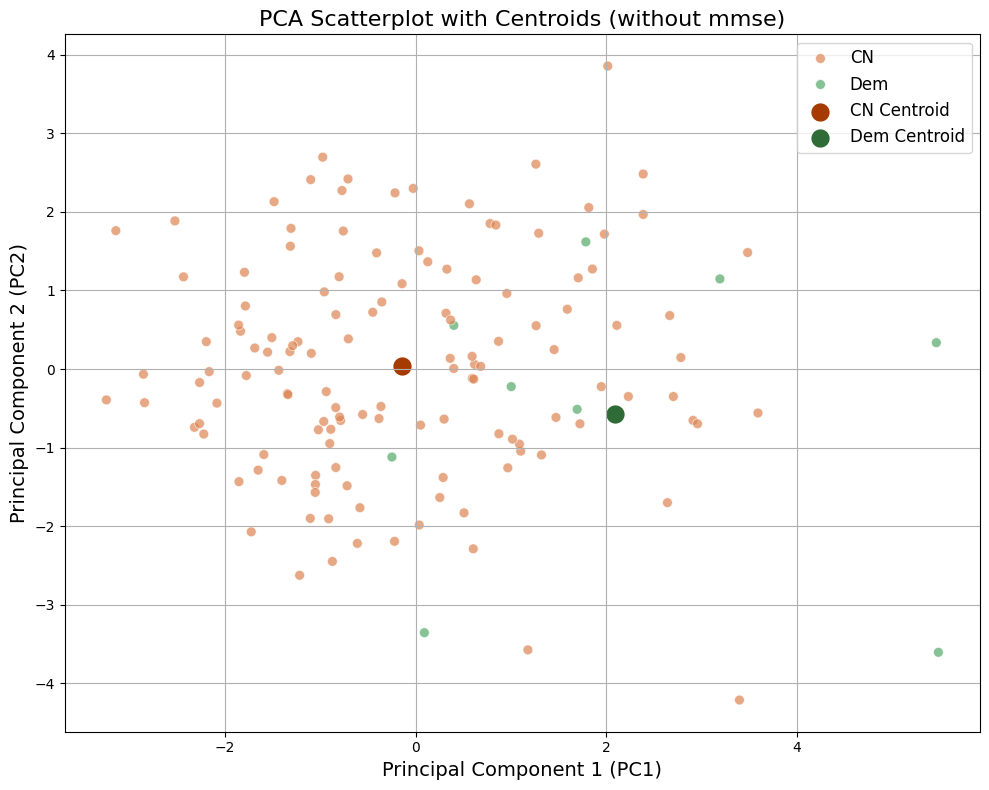

In [136]:
plot_pca_scatterplot(X[selected_features], y)

In [138]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# 데이터 준비 (X, y: X는 특성, y는 라벨)
# 예시로 y가 ['MCI', 'CN', 'Dem'] 형태라고 가정

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])

# PCA 수행 (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 각 라벨별로 데이터 필터링
labels = ['CN', 'Dem'] # 'MCI', 
centroids = {}

for label in labels:
    points = X_pca[y == label]  # y는 라벨 배열 (예: numpy 배열 또는 pandas Series)
    centroids[label] = np.mean(points, axis=0)

# 라벨 간 거리 계산
distances = {}
for i, label1 in enumerate(labels):
    for label2 in labels[i + 1:]:
        dist = euclidean(centroids[label1], centroids[label2])
        distances[f"{label1}-{label2}"] = dist

# 결과 출력
for pair, dist in distances.items():
    print(f"Distance between {pair}: {dist}")


Distance between CN-Dem: 2.319542933172695


In [36]:
vif_data = check_vif(train_activity_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL'])).sort_values('VIF', ascending=False)
vif_data

c:\Users\user\anaconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
23,activity_total,inf
8,activity_medium,inf
4,activity_high,inf
7,activity_low,inf
15,activity_score,8165.825497
3,activity_daily_movement,6054.359173
16,activity_score_meet_daily_targets,3116.496611
11,activity_met_min_low,2660.374659
12,activity_met_min_medium,2410.538221
18,activity_score_recovery_time,1813.783200


In [37]:
# filtering #1 : Remove inf
remove_columns = vif_data[vif_data['VIF'] == float('inf')]['Feature'].tolist()

vif_data = check_vif(train_activity_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']+remove_columns)).sort_values('VIF', ascending=False)
vif_data


,Feature,VIF
12,activity_score,7737.106361
13,activity_score_meet_daily_targets,2951.878101
15,activity_score_recovery_time,1707.745049
1,activity_cal_active,1546.705883
9,activity_met_min_medium,1351.528874
3,activity_daily_movement,832.758291
8,activity_met_min_low,757.907872
0,activity_average_met,586.415724
17,activity_score_training_frequency,515.672486
18,activity_score_training_volume,479.949546


In [38]:
# filtering #2 : Remove columns with VIF > 100
remove_columns += vif_data[vif_data['VIF'] > 100]['Feature'].tolist()

vif_data = check_vif(train_activity_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']+remove_columns)).sort_values('VIF', ascending=False)
vif_data

,Feature,VIF
1,activity_inactivity_alerts,13.196352
5,activity_score_move_every_hour,12.452971
6,activity_steps,5.345906
0,activity_cal_total,4.543218
4,activity_rest,2.894266
2,activity_met_min_inactive,2.365432
3,activity_non_wear,1.204087


In [39]:
# filtering #3 : Remove columns with VIF > 10
remove_columns += vif_data[vif_data['VIF'] > 10]['Feature'].tolist()

vif_data = check_vif(train_activity_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']+remove_columns)).sort_values('VIF', ascending=False)
vif_data

,Feature,VIF
0,activity_cal_total,4.489784
4,activity_steps,4.472482
3,activity_rest,2.123601
1,activity_met_min_inactive,1.908854
2,activity_non_wear,1.136834


In [40]:
# filtered_train_activity_mean

filtered_train_activity_mean_df = train_activity_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']+remove_columns)
filtered_train_activity_mean_df

,activity_cal_total,activity_met_min_inactive,activity_non_wear,activity_rest,activity_steps
0,2328.9375,11.96875,35.0,499.4375,5070.515625
1,2545.280702,6.649123,21.22807,515.877193,9584.631579
2,2221.857143,6.642857,71.261905,536.904762,5141.904762
3,2118.774194,8.145161,85.241935,634.580645,7494.274194
4,2278.313433,10.268657,83.522388,447.432836,10001.850746
...,...,...,...,...,...
136,2754.616667,5.5,27.483333,631.733333,16226.683333
137,2497.031915,3.542553,26.297872,698.5,11501.93617
138,2951.189189,4.27027,39.108108,715.702703,15482.594595
139,2761.947368,6.763158,42.315789,477.5,14147.421053


In [41]:
# filtering #1 : Remove inf and NaN

vif_data = check_vif(train_sleep_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL'])).sort_values('VIF', ascending=False)
print(vif_data)

remove_columns = vif_data[vif_data['VIF'] == float('inf')]['Feature'].tolist()
remove_columns+= vif_data[vif_data['VIF'].isnull()]['Feature'].tolist()
print(remove_columns)

vif_data = check_vif(train_sleep_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']+remove_columns)).sort_values('VIF', ascending=False)
vif_data

                        Feature           VIF
0                   sleep_awake           inf
8                   sleep_light           inf
25  sleep_temperature_deviation           inf
24      sleep_temperature_delta           inf
13                    sleep_rem           inf
26                  sleep_total           inf
2                    sleep_deep           inf
3                sleep_duration           inf
16                  sleep_score  5.471937e+04
23            sleep_score_total  1.803784e+04
22              sleep_score_rem  3.993568e+03
18             sleep_score_deep  2.920935e+03
20       sleep_score_efficiency  2.245127e+03
19     sleep_score_disturbances  2.113316e+03
17        sleep_score_alignment  1.002533e+03
4              sleep_efficiency  7.147941e+02
21          sleep_score_latency  1.489975e+02
10          sleep_midpoint_time  6.480818e+01
6               sleep_hr_lowest  3.973104e+01
5              sleep_hr_average  3.752872e+01
14               sleep_restless  9

c:\Users\user\anaconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\user\anaconda3\envs\test\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Feature,VIF
10,sleep_score,52628.261445
17,sleep_score_total,17373.616764
16,sleep_score_rem,3757.267039
12,sleep_score_deep,2796.001785
14,sleep_score_efficiency,2109.293246
13,sleep_score_disturbances,2018.105435
11,sleep_score_alignment,961.252541
1,sleep_efficiency,577.143027
15,sleep_score_latency,143.827805
3,sleep_hr_lowest,37.561723


In [42]:
# filtering #2 : Remove columns with VIF > 100
remove_columns += vif_data[vif_data['VIF'] > 100]['Feature'].tolist()

vif_data = check_vif(train_sleep_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']+remove_columns)).sort_values('VIF', ascending=False)
vif_data

,Feature,VIF
2,sleep_hr_lowest,33.405015
1,sleep_hr_average,31.044960
4,sleep_midpoint_time,2.120016
3,sleep_midpoint_at_delta,1.714788
5,sleep_onset_latency,1.381637
8,sleep_rmssd,1.339776
0,sleep_breath_average,1.284207
7,sleep_restless,1.129521
6,sleep_period_id,1.043079


In [43]:
# filtering #3 : Remove columns with VIF > 10
remove_columns += vif_data[vif_data['VIF'] > 10]['Feature'].tolist()

vif_data = check_vif(train_sleep_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']+remove_columns)).sort_values('VIF', ascending=False)
vif_data

,Feature,VIF
2,sleep_midpoint_time,2.028967
1,sleep_midpoint_at_delta,1.683968
3,sleep_onset_latency,1.255539
0,sleep_breath_average,1.141574
6,sleep_rmssd,1.114096
5,sleep_restless,1.080484
4,sleep_period_id,1.042065


In [44]:
# filtered_train_sleep_mean

filtered_train_sleep_mean_df = train_sleep_mean_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL']+remove_columns)
filtered_train_sleep_mean_df

,sleep_breath_average,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_restless,sleep_rmssd
0,17.884766,18519.71875,14351.25,728.90625,0.609375,18.625,47.421875
1,16.263158,12342.894737,14988.947368,684.210526,1.052632,49.631579,86.824561
2,16.666667,3721.309524,11937.142857,686.428571,1.380952,44.119048,27.52381
3,17.022177,19489.66129,17304.677419,577.741935,0.33871,41.564516,20.387097
4,16.376866,4687.462687,12452.686567,544.925373,1.208955,48.955224,31.014925
...,...,...,...,...,...,...,...
136,18.05,24002.7,18214.0,846.5,0.4,49.65,27.95
137,13.768617,32990.021277,17310.638298,957.446809,0.691489,28.819149,57.43617
138,18.040541,13881.135135,17322.162162,906.486486,1.297297,46.972973,30.081081
139,15.414474,3814.184211,14222.368421,840.789474,0.894737,39.078947,33.736842


In [99]:
# filtering #1 : Remove NaN

vif_data = check_vif(train_mmse_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL', 'DOCTOR_NM'])).sort_values('VIF', ascending=False)
print(vif_data)

# filtered_train_mmse
remove_columns = vif_data[vif_data['VIF'].isnull()]['Feature'].tolist()

vif_data = check_vif(train_mmse_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL', 'DOCTOR_NM', 'Q01']+remove_columns))
vif_data

      Feature        VIF
18      Q12_3        inf
19      Q12_4        inf
33        Q19        inf
32        Q18        inf
31        Q17        inf
30      Q16_3        inf
29      Q16_2        inf
28      Q16_1        inf
27        Q15        inf
25      Q14_1        inf
24      Q13_3        inf
23      Q13_2        inf
22      Q13_1        inf
20      Q12_5        inf
34      TOTAL        inf
17      Q12_2        inf
16      Q12_1        inf
12        Q10        inf
11        Q09        inf
10        Q08        inf
9         Q07        inf
8         Q06        inf
7         Q05        inf
6         Q04        inf
5         Q03        inf
4         Q02        inf
3         Q01        inf
0    DIAG_SEQ  53.136965
1    MMSE_NUM  52.366672
2   MMSE_KIND        NaN
13      Q11_1        NaN
14      Q11_2        NaN
15      Q11_3        NaN
21  Q12_TOTAL        NaN
26      Q14_2        NaN


c:\Users\user\anaconda3\envs\test\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\user\anaconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\user\anaconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,DIAG_SEQ,53.136965
1,MMSE_NUM,52.366672
2,Q02,4.737377
3,Q03,6.963729
4,Q04,4.438310
5,Q05,3.308793
6,Q06,inf
7,Q07,inf
8,Q08,5.570979
9,Q09,2.887990


In [45]:
# 특정 column을 제거했을 때의 나머지 column들의 VIF 값을 heatmap(1x25 벡터)으로 시각화. inf인 경우 100으로 대체

def check_vif_hitmap(df:pd.DataFrame, remove_column:str) -> pd.DataFrame:
    """
    df: DataFrame
    """

    # 데이터 정규화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df.drop(columns=remove_column))

    # VIF 계산
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.drop(columns=remove_column).columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    vif_data = vif_data.fillna(100)

    return vif_data

In [106]:
def plot_vif_hitmap_with_self(df: pd.DataFrame):
    """
    VIF 히트맵 생성 (자기 자신 포함).
    - 자기 자신은 0
    - inf 값은 10000
    - 히트맵에 inf 텍스트를 표시
    """
    columns = df.columns
    n = len(columns)
    vif_matrix = pd.DataFrame(np.zeros((n, n)), index=columns, columns=columns)

    for idx, remove_column in enumerate(columns):
        # 데이터 정규화
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df.drop(columns=[remove_column]))

        # VIF 계산
        vif_values = [
            variance_inflation_factor(X_scaled, i) 
            for i in range(X_scaled.shape[1])
        ]

        # inf 값은 10000으로 대체
        vif_values = [10000 if np.isinf(vif) else vif for vif in vif_values]

        # 자기 자신은 0
        vif_values.insert(idx, 0)

        # NaN값을 출력
        if np.nan in vif_values:
            print(f"NaN value in {remove_column}")

        # vif_values를 행으로 추가
        vif_matrix.loc[remove_column] = vif_values

    # 히트맵 생성
    plt.figure(figsize=(25, 25))
    sns.heatmap(vif_matrix, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
    plt.title("VIF Heatmap")
    plt.show()

    return vif_matrix
    


In [122]:
def remove_constant_and_duplicate_columns(df):
    # 상수 컬럼 제거
    df = df.loc[:, df.nunique() > 1]
    # # 중복 컬럼 제거
    # df = df.loc[:, ~df.T.duplicated()]
    return df

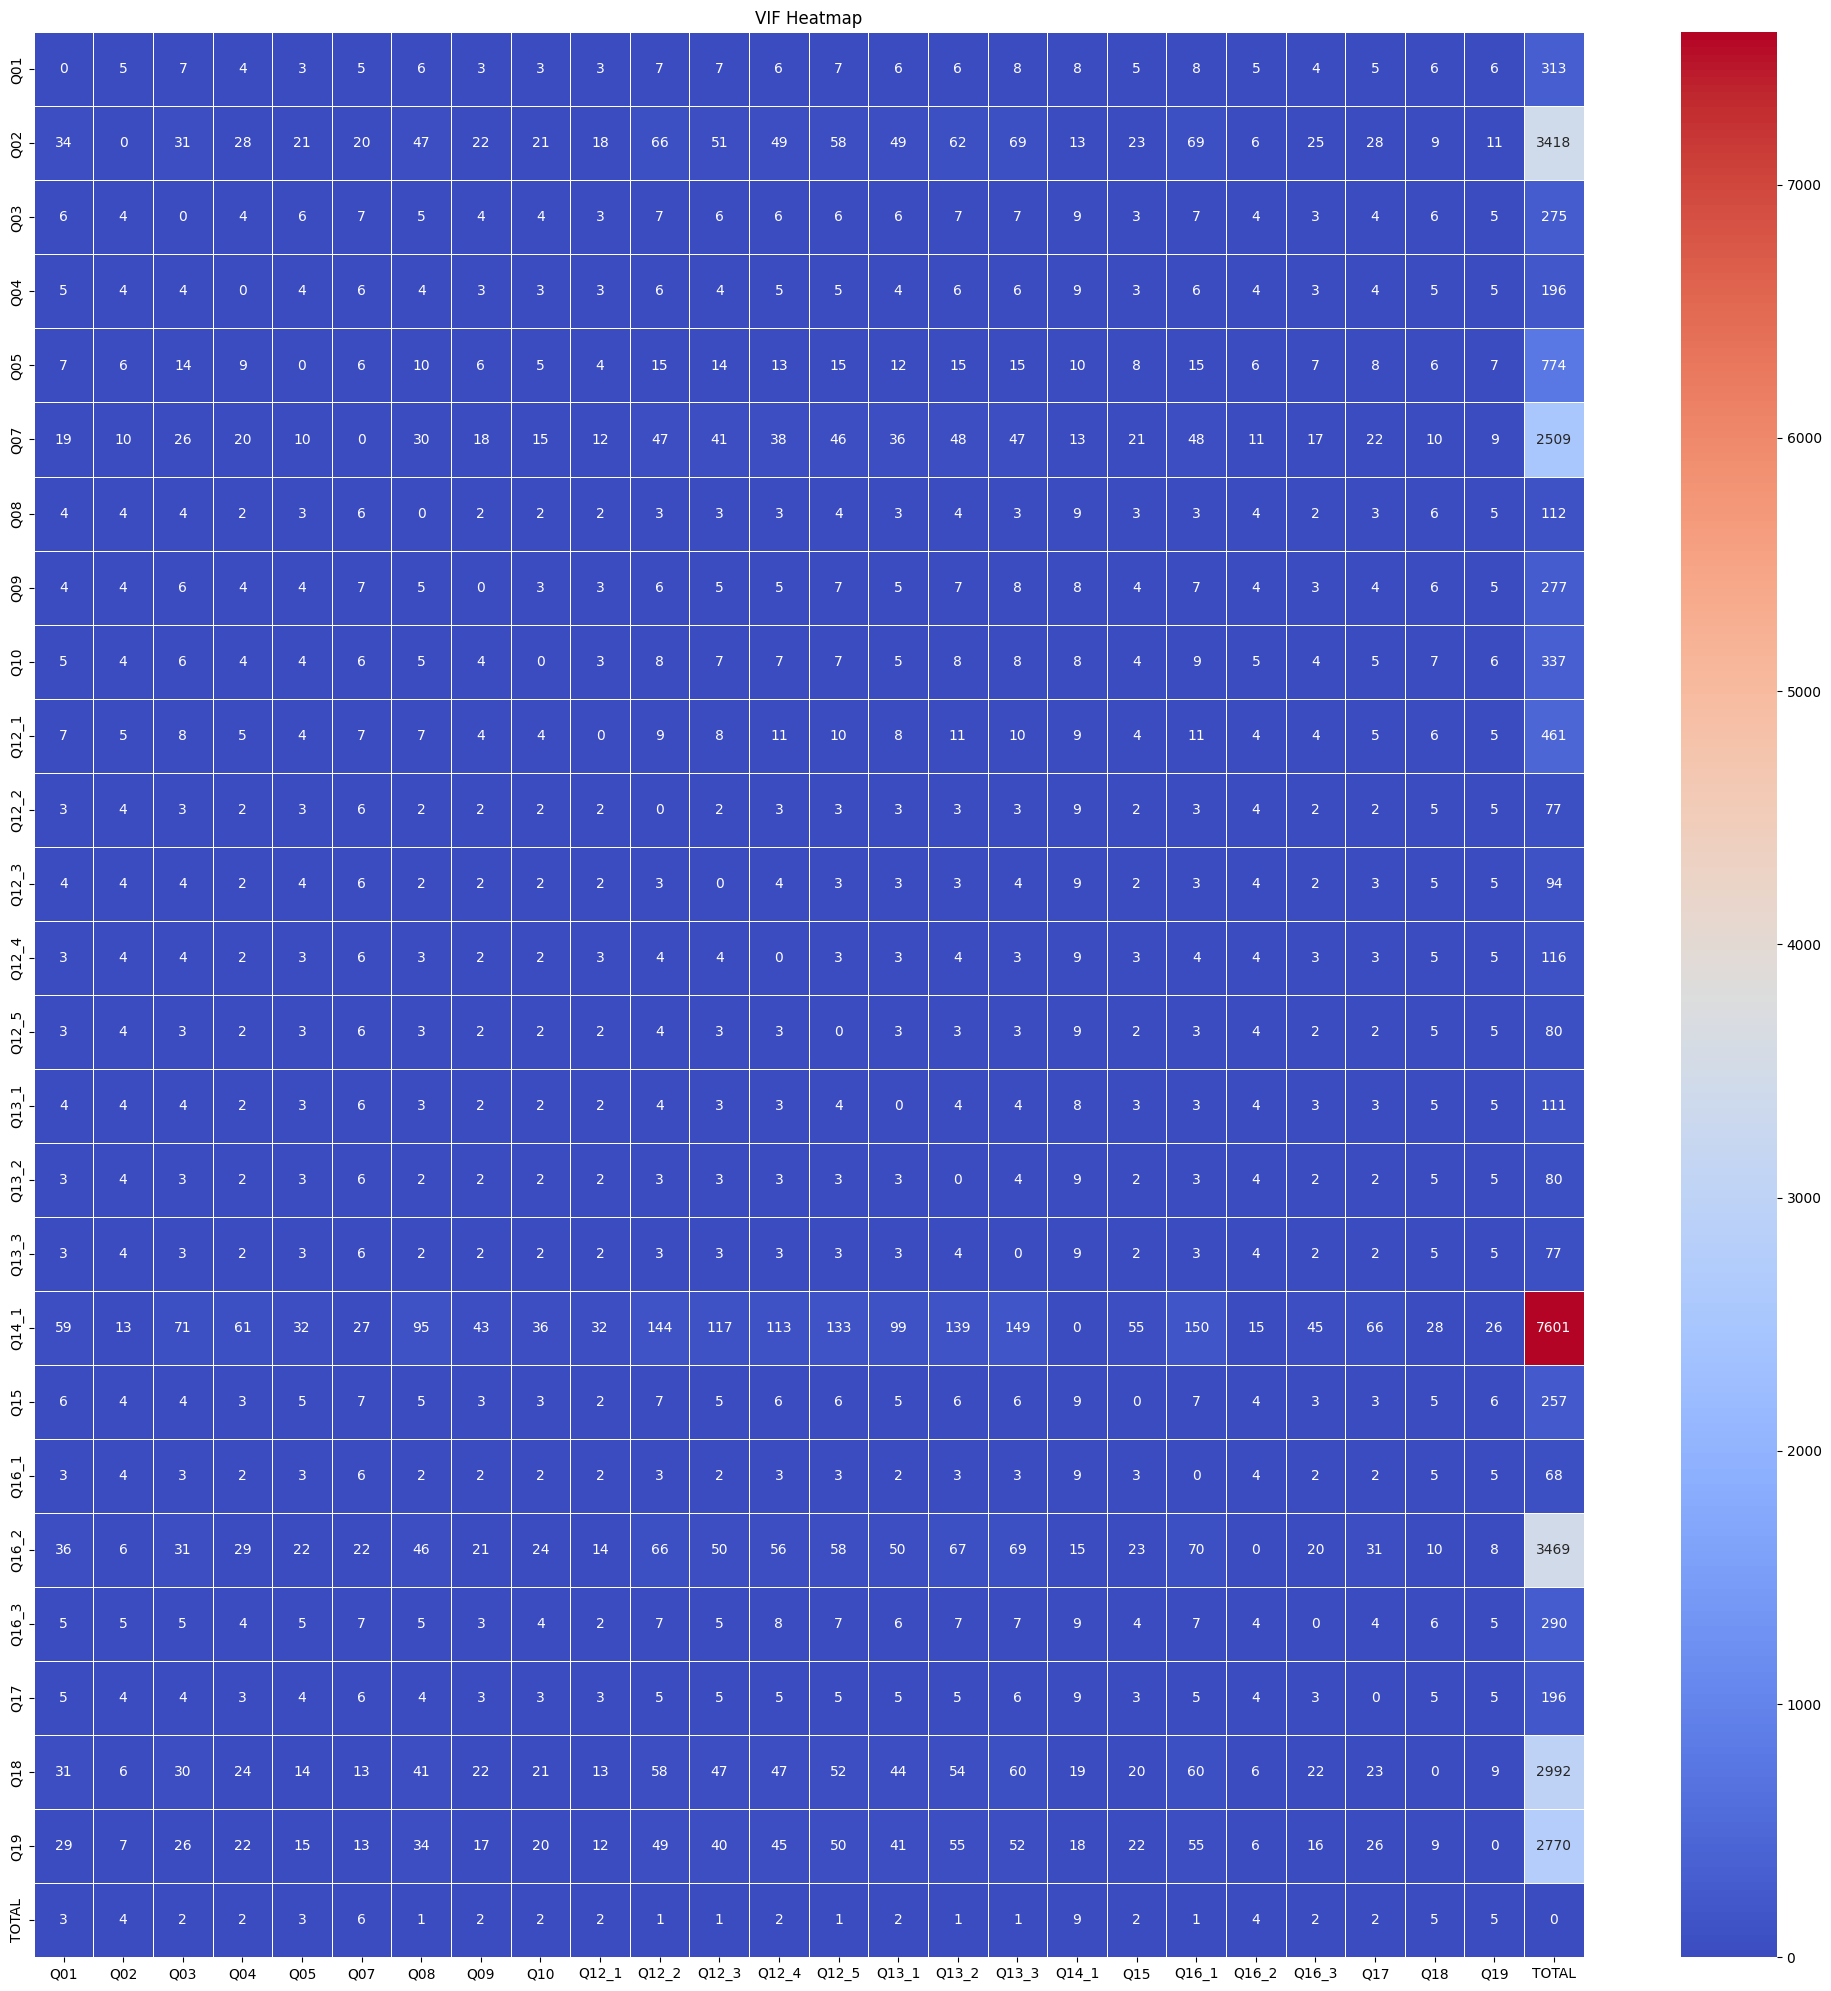

In [125]:
train_mmse_df_cleaned = train_mmse_df.drop(columns=['DIAG_NM', 'SAMPLE_EMAIL', 'DOCTOR_NM', "MMSE_NUM", "DIAG_SEQ", "MMSE_KIND", 'Q06'])
train_mmse_df_cleaned = remove_constant_and_duplicate_columns(train_mmse_df_cleaned)
df = plot_vif_hitmap_with_self(train_mmse_df_cleaned)


In [62]:
check_vif(train_final_df[['Q06', 'Q07']])

c:\Users\user\anaconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Q06,inf
1,Q07,inf


In [47]:
check_vif(train_final_df[['DIAG_SEQ', 'MMSE_NUM']])

,Feature,VIF
0,DIAG_SEQ,43.607716
1,MMSE_NUM,43.607716


In [52]:
check_vif(train_final_df[['TOTAL', 'MMSE_NUM']])

,Feature,VIF
0,TOTAL,1.026173
1,MMSE_NUM,1.026173


In [49]:
check_vif(train_final_df[['TOTAL', 'Q19']])

,Feature,VIF
0,TOTAL,1.370951
1,Q19,1.370951


## 모델 학습

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

### 데이터 준비

In [ ]:
# 필요한 열 제외
X = train_final_df.drop(columns=['SAMPLE_EMAIL', 'DIAG_NM'])
y = train_final_df['DIAG_NM']

# 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # CN, MCI, Dem -> 0, 1, 2로 인코딩
y_categorical = to_categorical(y_encoded)  # 원핫 인코딩

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [165]:
# 필요한 열 제외
# X = train_final_df.drop(columns=['SAMPLE_EMAIL', 'DIAG_NM'])
# y = train_final_df['DIAG_NM']
X = X[selected_features]
y =y

# 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # CN, MCI, Dem -> 0, 1, 2로 인코딩
# y_categorical = to_categorical(y_encoded)  # 원핫 인코딩

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [169]:
X

,sleep_restless,sleep_score_disturbances,activity_rest,sleep_midpoint_at_delta,sleep_score_deep,activity_met_min_inactive,activity_inactive,sleep_score_latency,sleep_score_alignment,sleep_onset_latency,sleep_rmssd
0,18.625,79.0,499.4375,18519.71875,98.546875,11.96875,606.203125,85.8125,96.65625,728.90625,47.421875
1,49.631579,53.315789,515.877193,12342.894737,84.684211,6.649123,543.438596,80.175439,84.842105,684.210526,86.824561
2,44.119048,57.190476,536.904762,3721.309524,87.714286,6.642857,650.571429,85.785714,92.0,686.428571,27.52381
3,41.564516,62.951613,634.580645,19489.66129,84.564516,8.145161,462.919355,76.903226,98.451613,577.741935,20.387097
4,48.955224,49.985075,447.432836,4687.462687,95.179104,10.268657,608.283582,76.746269,99.910448,544.925373,31.014925
...,...,...,...,...,...,...,...,...,...,...,...
136,49.65,55.666667,631.733333,24002.7,54.483333,5.5,400.933333,82.233333,89.483333,846.5,27.95
137,28.819149,72.861702,698.5,32990.021277,88.276596,3.542553,452.882979,81.595745,88.93617,957.446809,57.43617
138,46.972973,53.918919,715.702703,13881.135135,79.0,4.27027,336.594595,79.27027,93.594595,906.486486,30.081081
139,39.078947,61.578947,477.5,3814.184211,68.236842,6.763158,499.973684,75.684211,99.078947,840.789474,33.736842


In [166]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 11), (29, 11), (112,), (29,))

In [167]:
import statsmodels.api as sm

# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.142928
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  112
Model:                          Logit   Df Residuals:                      100
Method:                           MLE   Df Model:                           11
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                  0.4889
Time:                        18:02:44   Log-Likelihood:                -16.008
converged:                       True   LL-Null:                       -31.320
Covariance Type:            nonrobust   LLR p-value:                  0.001264
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6051      1.147     -4.016      0.000      -6.853      -2.358
x1             4.1193      1.

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8620689655172413
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.00      0.00      0.00         0

    accuracy                           0.86        29
   macro avg       0.50      0.43      0.46        29
weighted avg       1.00      0.86      0.93        29

Confusion Matrix:
 [[25  4]
 [ 0  0]]


c:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 모델 정의 및 학습

In [ ]:
# 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), 
          kernel_regularizer=regularizers.l2(0.01)),  # L2 정규화 추가
    Dropout(0.5),  # Dropout 추가
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 정규화 추가
    Dropout(0.5),  # Dropout 추가
    Dense(3, activation='softmax')  # 3개의 클래스를 예측하기 위한 softmax 출력층
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# EarlyStopping 콜백 설정 (val_accuracy 기준)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# 모델 학습 (EarlyStopping 콜백 추가)
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 모델 예측 (train 데이터와 val 데이터에 대해 예측)
y_train_pred_best = np.argmax(model.predict(X_train), axis=1)
y_val_pred_best = np.argmax(model.predict(X_val), axis=1)

# 원-핫 인코딩을 클래스 인덱스로 변환
y_train = np.argmax(y_train, axis=1)  
y_val = np.argmax(y_val, axis=1)      



# F1 Score 계산 (다중 클래스의 경우 평균 방법을 지정할 수 있음)
f1_train = f1_score(y_train, y_train_pred_best, average='weighted')
f1_val = f1_score(y_val, y_val_pred_best, average='weighted')

print(f"Train F1 Score: {f1_train:.4f}")
print(f"Validation F1 Score: {f1_val:.4f}")

# 최고 모델의 Accuracy 출력
train_accuracy_best = np.mean(y_train == y_train_pred_best)
val_accuracy_best = np.mean(y_val == y_val_pred_best)

print(f"Best Train Accuracy: {train_accuracy_best:.4f}")
print(f"Best Validation Accuracy: {val_accuracy_best:.4f}")

Epoch 1/50
14/14 [==============================] - 0s 14ms/step - loss: 2.5396 - accuracy: 0.4643 - val_loss: 1.9262 - val_accuracy: 0.6897
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 2.4231 - accuracy: 0.4643 - val_loss: 1.8240 - val_accuracy: 0.6897
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 2.4897 - accuracy: 0.5000 - val_loss: 1.7603 - val_accuracy: 0.7241
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 2.3235 - accuracy: 0.4911 - val_loss: 1.7259 - val_accuracy: 0.7931
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 2.1115 - accuracy: 0.5268 - val_loss: 1.6959 - val_accuracy: 0.7931
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 2.0204 - accuracy: 0.5536 - val_loss: 1.6738 - val_accuracy: 0.7586
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 1.9128 - accuracy: 0.5625 - val_loss: 1.6684 - val_accuracy: 0.6897
Epoch 8/50
14/14 [=

### 그래프

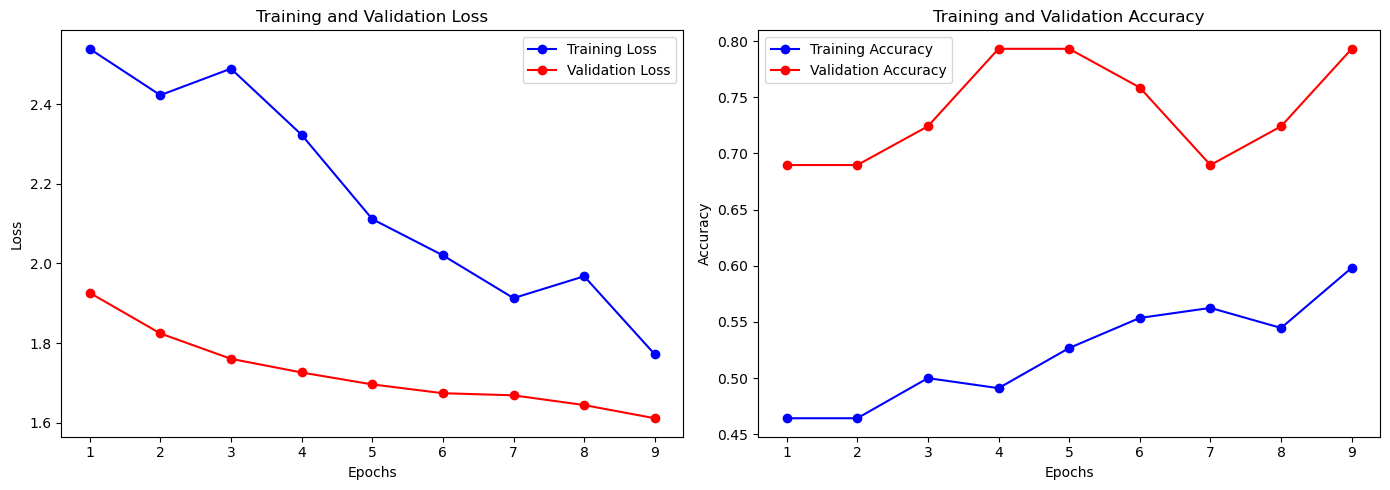

In [ ]:
import matplotlib.pyplot as plt

# history.history에서 필요한 값을 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 subplot: Loss 그래프
ax1.plot(epochs, train_loss, 'bo-', label='Training Loss')
ax1.plot(epochs, val_loss, 'ro-', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 subplot: Accuracy 그래프
ax2.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
ax2.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

### 테스트 데이터에 대한 성능 확인

In [ ]:
# 필요한 열 제외
X_test = valid_final_df.drop(columns=['SAMPLE_EMAIL', 'DIAG_NM'])
y_test = valid_final_df['DIAG_NM']

# 라벨 인코딩
y_test_encoded = label_encoder.transform(y_test)  # CN, MCI, Dem -> 0, 1, 2로 인코딩
y_test_categorical = to_categorical(y_test_encoded)  # 원핫 인코딩

# 데이터 스케일링
X_test_scaled = scaler.transform(X_test)

# 모델 예측 (test 데이터에 대해 예측)
y_test_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# 원-핫 인코딩을 클래스 인덱스로 변환
y_test = np.argmax(y_test_categorical, axis=1)



# F1 Score 계산 (다중 클래스의 경우 평균 방법을 지정할 수 있음)
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test F1 Score: {f1_test:.4f}")

# 최종 모델의 Accuracy 
test_accuracy = np.mean(y_test == y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

2/2 [==============================] - 0s 2ms/step
Test F1 Score: 0.6061
Test Accuracy: 0.6061


In [ ]:
## y_test와 y_test_pred간의 confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

## RandomForest

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

### 데이터 준비

In [100]:
# 1. 'SAMPLE_EMAIL'과 'DIAG_NM' 열 제외하고 feature와 label 분리
y = train_final_df['DIAG_NM']  # label: CN, MCI, Dem (문자열 라벨)
X = train_final_df.drop(columns=['SAMPLE_EMAIL', 'DIAG_NM'])  # feature: 87개의 columns

# 2. 라벨 인코딩 (String -> Integer)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'CN' -> 0, 'MCI' -> 1, 'Dem' -> 2

# 데이터 전처리 (훈련 데이터와 동일한 방식으로 스케일링)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. train/validation 데이터로 나누기 (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

### 모델 학습 및 성능 평가

In [172]:
# 4. RandomForest 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. 모델 예측
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# 6. 성능 평가 - 정확도 및 F1-score 계산
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')  # Weighted F1-score
val_f1 = f1_score(y_val, y_test_pred, average='weighted')  # Weighted F1-score

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"teset Accuracy: {val_accuracy:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"test F1 Score: {val_f1:.4f}")

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

### 개선

In [102]:
rf_model = RandomForestClassifier(
    n_estimators=100, # 트리의 개수
    max_depth=10,  # 트리의 최대 깊이 
    min_samples_split=10, # 노드를 분할하기 위한 최소한의 샘플 데이터 수
    min_samples_leaf=5, # 리프 노드가 되기 위해 필요한 최소한의 샘플 데이터 수
    max_features='sqrt', # 최적의 분할을 위해 고려할 최대 feature 개수
    random_state=42
)

rf_model.fit(X_train, y_train)

# 예측 및 평가
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")

Train Accuracy: 0.9196
Validation Accuracy: 0.7586
Train F1 Score: 0.9173
Validation F1 Score: 0.7256


### 상위 10개 feature만으로 재 학습

In [190]:
# 1. 'SAMPLE_EMAIL'과 'DIAG_NM' 열 제외하고 feature와 label 분리
# y = train_final_df['DIAG_NM']  # label: CN, MCI, Dem (문자열 라벨)
# X = train_final_df.drop(columns=['SAMPLE_EMAIL', 'DIAG_NM'])  # feature: 87개의 columns

# 2. 라벨 인코딩 (String -> Integer)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'CN' -> 0, 'MCI' -> 1, 'Dem' -> 2

# 데이터 전처리 (훈련 데이터와 동일한 방식으로 스케일링)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. train/validation 데이터로 나누기 (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [191]:
# RandomForest 모델 학습 (모든 feature 사용)
rf_model = RandomForestClassifier(
    n_estimators=100,  # 트리의 수
    max_depth=10,  # 트리 깊이 제한
    min_samples_split=10,  # 최소 샘플 수 (내부 노드 분할)
    min_samples_leaf=5,  # 리프 노드 최소 샘플 수
    max_features='sqrt',  # 각 트리가 사용할 최대 feature 수
    random_state=42
)

# 모델 학습
rf_model.fit(X_train, y_train)

# 중요 feature 선택 (상위 10개)
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]  # 중요도가 높은 순서로 인덱스 정렬

# 상위 10개 feature 선택
X_train_selected = X_train[:, indices[:10]]  # 상위 10개 feature만 선택
X_val_selected = X_val[:, indices[:10]]  # 검증 데이터도 동일하게 변환

# RandomForest 모델 재학습 (상위 10개 feature만 사용)
rf_model_selected = RandomForestClassifier(
    n_estimators=100,  # 트리의 수
    max_depth=10,  # 트리 깊이 제한
    min_samples_split=10,  # 최소 샘플 수 (내부 노드 분할)
    min_samples_leaf=5,  # 리프 노드 최소 샘플 수
    max_features='sqrt',  # 각 트리가 사용할 최대 feature 수
    random_state=42
)

# 재학습
rf_model_selected.fit(X_train_selected, y_train)

# 예측
y_train_pred = rf_model_selected.predict(X_train_selected)
y_val_pred = rf_model_selected.predict(X_val_selected)

# 정확도 및 F1 score 계산
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# 결과 출력
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")

# 선택된 상위 10개 feature 출력
X = train_final_df.drop(columns=['SAMPLE_EMAIL', 'DIAG_NM'])
print(f"Selected features (top 10): {X.columns[indices[:10]]}")

Train Accuracy: 0.9464
Validation Accuracy: 0.9310
Train F1 Score: 0.9362
Validation F1 Score: 0.8978
Selected features (top 10): Index(['sleep_duration', 'sleep_light', 'activity_score_meet_daily_targets',
       'activity_rest', 'sleep_total', 'sleep_midpoint_time',
       'activity_met_min_low', 'activity_low', 'sleep_score_total',
       'sleep_score_latency'],
      dtype='object')


In [192]:
y_val, y_val_pred

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0]))

In [193]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 나이브 베이즈 모델 학습
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 예측
y_pred_nb = nb_model.predict(X_test)

# 평가
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

ValueError: X has 11 features, but GaussianNB is expecting 51 features as input.

In [186]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# 1. val_final_df에서 'SAMPLE_EMAIL'과 'DIAG_NM' 열 제외하고 feature 선택
X_val_final = X_val# valid_final_df.drop(columns=['SAMPLE_EMAIL', 'DIAG_NM'])  # feature

# 2. 라벨 인코딩 (train 데이터에서 사용한 label_encoder 사용)
y_val_true = valid_final_df['DIAG_NM']  # 실제 라벨
y_val_encoded = label_encoder.transform(y_val_true)  # 'CN' -> 0, 'MCI' -> 1, 'Dem' -> 2

# 3. val_final_df에서 train 데이터에서 사용한 동일한 방식으로 스케일링 적용
X_val_scaled = scaler.transform(X_val_final)  # 이미 훈련 데이터에서 scaler.fit을 했기 때문에 transform만 사용

# 4. val_final_df에서 상위 10개 중요한 feature만 선택
X_val_selected = X_val_scaled[:, indices[:10]]  # 상위 10개 feature만 선택

# 5. 학습된 RandomForest 모델을 사용하여 예측
y_val_pred = rf_model_selected.predict(X_val_selected)

# 6. 평가 (정확도 및 F1 score 계산)
# 예측값을 숫자 라벨로 비교 (y_val_pred는 이미 숫자라 비교 가능)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
val_f1 = f1_score(y_val_encoded, y_val_pred, average='weighted')

# 7. 결과 출력
print(f"Validation Accuracy on Test Data: {val_accuracy:.4f}")
print(f"Validation F1 Score on Test Data: {val_f1:.4f}")

# 예측된 라벨과 실제 라벨 비교
print("Predicted Labels vs True Labels:")
print(f"Predicted (numerical): {y_val_pred[:10]}")  # 상위 10개 예시 출력 (숫자 라벨)
print(f"True (numerical): {y_val_encoded[:10]}")  # 상위 10개 실제 라벨 출력 (숫자 라벨)


ValueError: y contains previously unseen labels: 'MCI'

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix 계산
cm = confusion_matrix(y_val_encoded, y_val_pred)

# Confusion Matrix를 DataFrame으로 변환 (세부 라벨 이름을 포함시키기 위해)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={'size': 15})

# 제목 추가
plt.title('Confusion Matrix for Model Evaluation', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


NameError: name 'y_val_encoded' is not defined